In [14]:
import pandas as pd

# 读取CSV文件
file_path = '/Users/bytedance/Code/OSS_Bot_Taxonomy_and_Analysis/RQ2_bot_evluation_process/data/results/rdd_analysis_median_results/rdd_analysis_medians_summary.csv'
data = pd.read_csv(file_path)

# 定义分组
groups = {
    'Project': ['Number of Forks', 'Activity of the Project', 'Number of Stars'],
    'Contributor': ['Number of New Contributors', 'Number of Key Contributors', 'Number of Inactive Contributors'],
    'Pull Request': ['Average Duration of Pull Requests', 'Number of Reviews for Pull Requests',
                     'Average Time to Resolve Pull Requests', 'Total Number of Pull Requests'],
    'Code': ['Total Number of Lines Changed'],
    'Issue': ['Number of Newly Raised Issues', 'Number of Comments on Issues', 'Number of Closed Issues',
              'Average Time to Resolve Issues']
}

# 将相关列转换为数值类型，如果转换失败则设置为NaN
numeric_columns = ['intercept', 'trend', 'break_point_effect', 'p_value_intercept', 'p_value_trend',
                   'p_value_break_point_effect', 'r_squared', 'total_count']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 计算每个分组的平均值
results = {}
for group, metrics in groups.items():
    group_data = data[data['metric'].isin(metrics)]
    group_avg = group_data[numeric_columns].mean().reset_index()
    group_avg.columns = ['Metric', 'Average']
    results[group] = group_avg

# 打印结果
for group, group_avg in results.items():
    print(f"Group: {group}")
    print(group_avg.to_string(index=False))
    print("\n")

Group: Project
                    Metric     Average
                 intercept    0.382000
                     trend   -0.000816
        break_point_effect    0.005072
         p_value_intercept    0.001837
             p_value_trend    0.179548
p_value_break_point_effect    0.348641
                 r_squared    0.268370
               total_count 3618.187500


Group: Contributor
                    Metric     Average
                 intercept    0.431909
                     trend    0.013923
        break_point_effect    0.006957
         p_value_intercept    0.001954
             p_value_trend    0.204074
p_value_break_point_effect    0.311400
                 r_squared    0.445161
               total_count 2274.000000


Group: Pull Request
                    Metric     Average
                 intercept    0.445210
                     trend    0.004510
        break_point_effect    0.001365
         p_value_intercept    0.009873
             p_value_trend    0.246583
p_valu

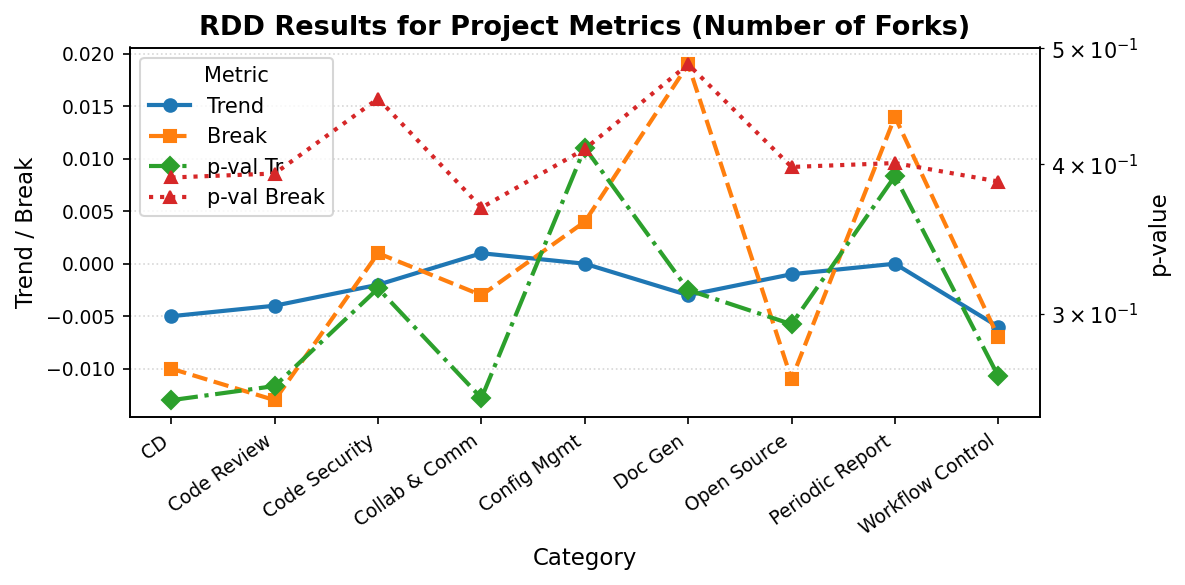

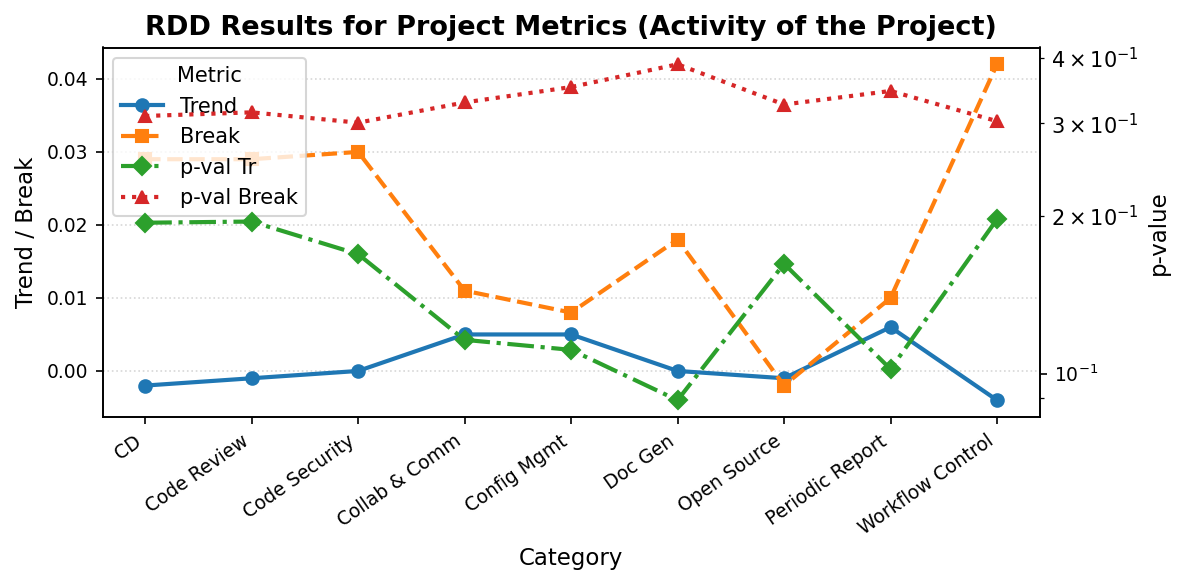

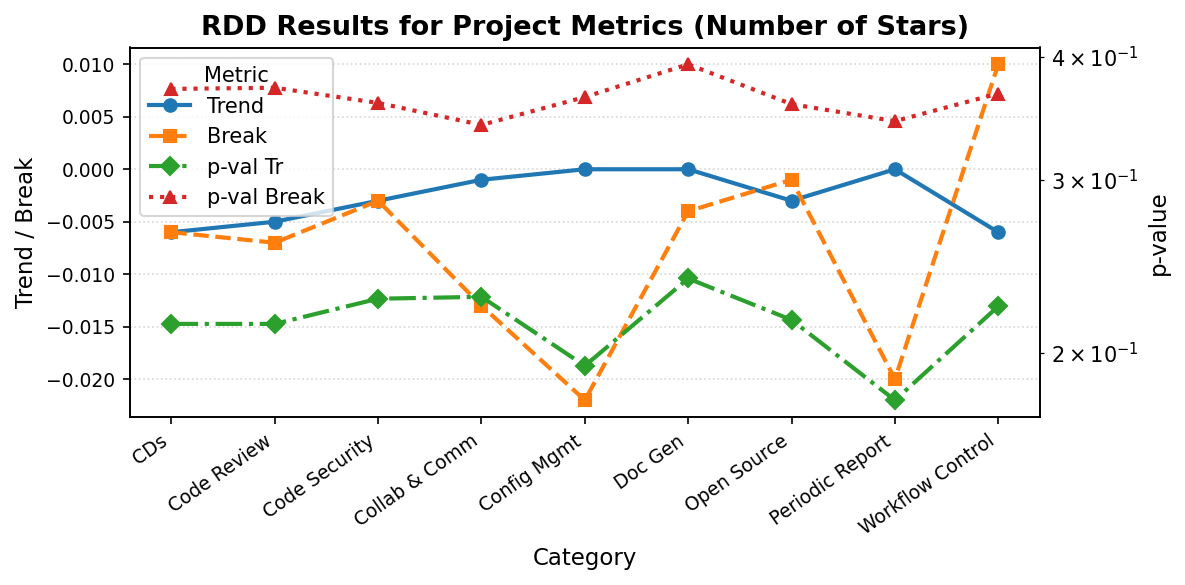

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    # Number of Forks
    ["Number of Forks", "CD", 0.403, -0.005, -0.010, 0.001, 0.254, 0.390, 0.228, 10806],
    ["Number of Forks", "Code Review", 0.405, -0.004, -0.013, 0.001, 0.261, 0.393, 0.225, 11234],
    ["Number of Forks", "Code Security", 0.405, -0.002, 0.001, 0.002, 0.315, 0.454, 0.183, 700],
    ["Number of Forks", "Collab & Comm", 0.408, 0.001, -0.003, 0.001, 0.255, 0.368, 0.244, 478],
    ["Number of Forks", "Config Mgmt", 0.423, -0.000, 0.004, 0.001, 0.413, 0.412, 0.180, 183],
    ["Number of Forks", "Doc Gen", 0.409, -0.003, 0.019, 0.001, 0.314, 0.485, 0.179, 340],
    ["Number of Forks", "Open Source", 0.412, -0.001, -0.011, 0.001, 0.294, 0.398, 0.210, 996],
    ["Number of Forks", "Periodic Report", 0.415, -0.000, 0.014, 0.001, 0.391, 0.401, 0.186, 189],
    ["Number of Forks", "Workflow Control", 0.402, -0.006, -0.007, 0.001, 0.266, 0.387, 0.222, 2836],
    # Activity of the Project
    ["Activity of the Project", "CD", 0.395, -0.002, 0.029, 0.001, 0.194, 0.310, 0.271, 10589],
    ["Activity of the Project", "Code Review", 0.397, -0.001, 0.029, 0.001, 0.195, 0.315, 0.272, 11121],
    ["Activity of the Project", "Code Security", 0.404, -0.000, 0.030, 0.001, 0.169, 0.301, 0.308, 738],
    ["Activity of the Project", "Collab & Comm", 0.431, 0.005, 0.011, 0.000, 0.116, 0.329, 0.311, 495],
    ["Activity of the Project", "Config Mgmt", 0.448, 0.005, 0.008, 0.000, 0.111, 0.352, 0.305, 199],
    ["Activity of the Project", "Doc Gen", 0.417, -0.000, 0.018, 0.000, 0.089, 0.389, 0.326, 358],
    ["Activity of the Project", "Open Source", 0.427, -0.001, -0.002, 0.001, 0.162, 0.326, 0.309, 1028],
    ["Activity of the Project", "Periodic Report", 0.442, 0.006, 0.010, 0.000, 0.102, 0.346, 0.322, 208],
    ["Activity of the Project", "Workflow Control", 0.391, -0.004, 0.042, 0.001, 0.197, 0.303, 0.275, 2920],
    # Number of Stars
    ["Number of Stars", "CDs", 0.335, -0.006, -0.006, 0.004, 0.214, 0.371, 0.242, 12411],
    ["Number of Stars", "Code Review", 0.339, -0.005, -0.007, 0.003, 0.214, 0.372, 0.242, 12862],
    ["Number of Stars", "Code Security", 0.341, -0.003, -0.003, 0.003, 0.227, 0.359, 0.225, 781],
    ["Number of Stars", "Collab & Comm", 0.340, -0.001, -0.013, 0.003, 0.228, 0.341, 0.250, 526],
    ["Number of Stars", "Config Mgmt", 0.359, -0.000, -0.022, 0.002, 0.194, 0.364, 0.243, 202],
    ["Number of Stars", "Doc Gen", 0.367, -0.000, -0.004, 0.002, 0.238, 0.393, 0.224, 359],
    ["Number of Stars", "Open Source", 0.340, -0.003, -0.001, 0.004, 0.216, 0.358, 0.224, 1128],
    ["Number of Stars", "Periodic Report", 0.357, -0.000, -0.020, 0.002, 0.179, 0.344, 0.247, 207],
    ["Number of Stars", "Workflow Control", 0.328, -0.006, 0.010, 0.004, 0.223, 0.367, 0.229, 3278],
]

columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)

# 转换数值型
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for metric in df['Metric'].unique():
    subdf = df[df['Metric'] == metric]
    categories = subdf['Category'].tolist()
    x = range(len(categories))

    fig, ax1 = plt.subplots(figsize=(8, 4), dpi=150)

    # 主y轴：Trend 和 Break
    ax1.plot(x, subdf["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
    ax1.plot(x, subdf["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
    ax1.set_xlabel("Category", fontsize=11)
    ax1.set_ylabel("Trend / Break", fontsize=11)
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=9)
    ax1.tick_params(axis='y', labelsize=9)
    ax1.grid(axis='y', linestyle=':', alpha=0.5)

    # 副y轴：p值
    ax2 = ax1.twinx()
    ax2.plot(x, subdf["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
    ax2.plot(x, subdf["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
    ax2.set_ylabel("p-value", fontsize=11)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_yscale('log')  # p值用对数坐标更直观

    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, title="Metric")

    plt.title(f"RDD Results for Project Metrics ({metric})", fontsize=13, weight='bold')
    plt.tight_layout()
    fname = f"rdd_project_metrics_{metric.replace(' ', '_').replace('/', '_')}_dual_axis.pdf"
    plt.savefig(fname, bbox_inches='tight')
    plt.show()


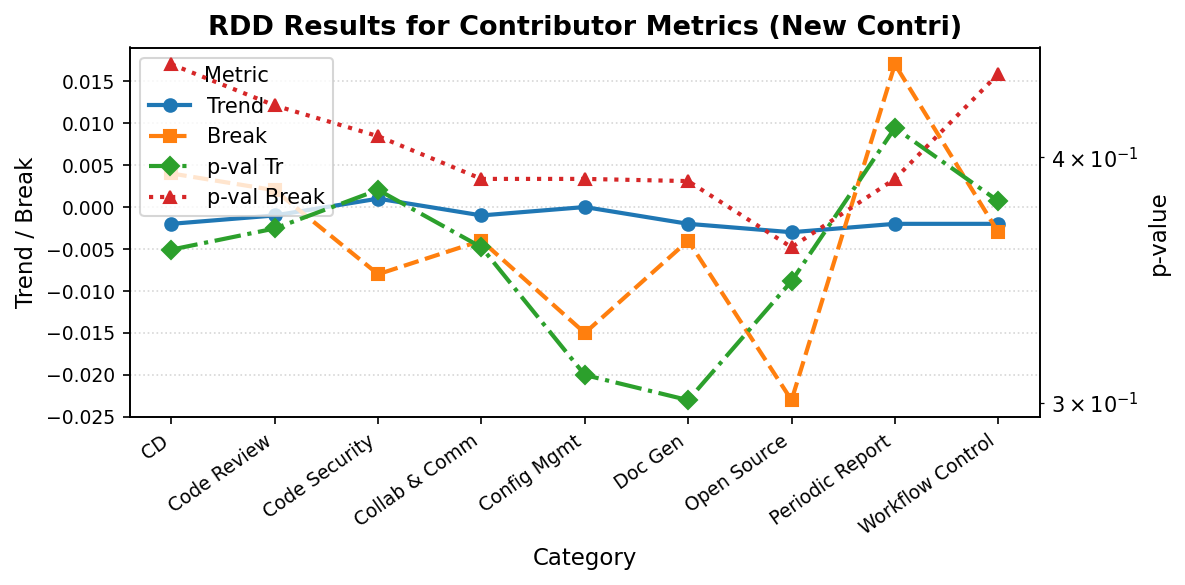

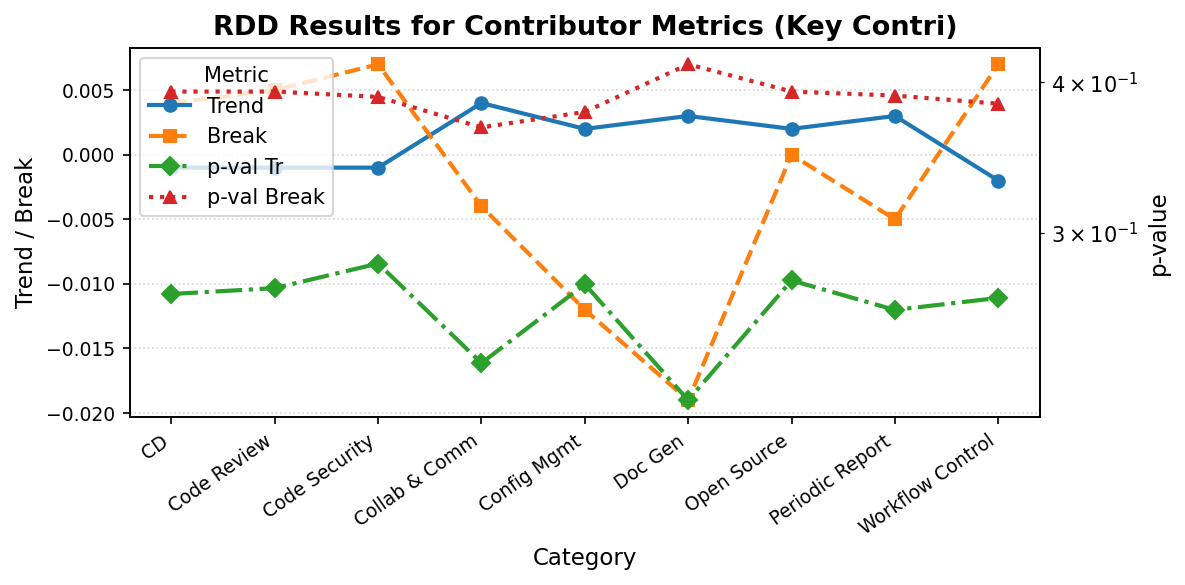

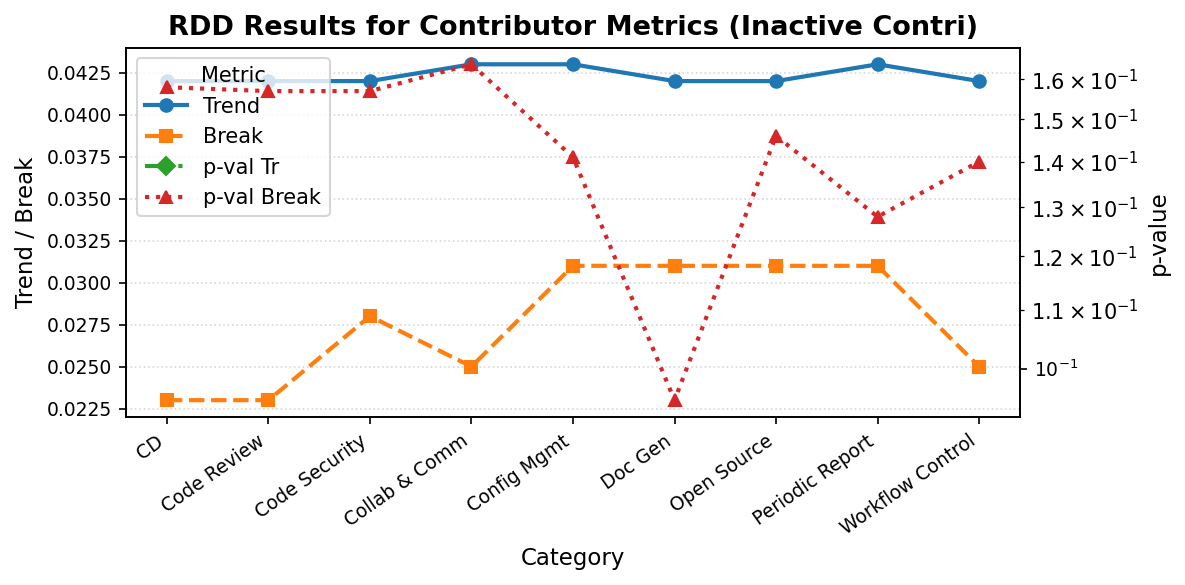

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    # New Contri
    ["New Contri", "CD", 0.383, -0.002, 0.004, 0.004, 0.359, 0.446, 0.130, 1728],
    ["New Contri", "Code Review", 0.385, -0.001, 0.002, 0.004, 0.368, 0.425, 0.131, 1785],
    ["New Contri", "Code Security", 0.415, 0.001, -0.008, 0.002, 0.385, 0.410, 0.126, 115],
    ["New Contri", "Collab & Comm", 0.413, -0.001, -0.004, 0.002, 0.360, 0.390, 0.145, 113],
    ["New Contri", "Config Mgmt", 0.388, -0.000, -0.015, 0.003, 0.310, 0.390, 0.144, 47],
    ["New Contri", "Doc Gen", 0.394, -0.002, -0.004, 0.003, 0.301, 0.389, 0.142, 136],
    ["New Contri", "Open Source", 0.394, -0.003, -0.023, 0.003, 0.346, 0.360, 0.155, 190],
    ["New Contri", "Periodic Report", 0.378, -0.002, 0.017, 0.004, 0.414, 0.390, 0.128, 52],
    ["New Contri", "Workflow Control", 0.388, -0.002, -0.003, 0.004, 0.380, 0.441, 0.131, 432],
    # Key Contri
    ["Key Contri", "CD", 0.374, -0.001, 0.004, 0.004, 0.267, 0.393, 0.195, 10452],
    ["Key Contri", "Code Review", 0.373, -0.001, 0.005, 0.004, 0.270, 0.393, 0.195, 11002],
    ["Key Contri", "Code Security", 0.372, -0.001, 0.007, 0.004, 0.283, 0.389, 0.199, 730],
    ["Key Contri", "Collab & Comm", 0.404, 0.004, -0.004, 0.002, 0.234, 0.367, 0.234, 494],
    ["Key Contri", "Config Mgmt", 0.441, 0.002, -0.012, 0.001, 0.272, 0.378, 0.254, 198],
    ["Key Contri", "Doc Gen", 0.433, 0.003, -0.019, 0.001, 0.218, 0.414, 0.266, 356],
    ["Key Contri", "Open Source", 0.391, 0.002, 0.000, 0.003, 0.274, 0.393, 0.218, 1027],
    ["Key Contri", "Periodic Report", 0.431, 0.003, -0.005, 0.001, 0.259, 0.390, 0.266, 207],
    ["Key Contri", "Workflow Control", 0.370, -0.002, 0.007, 0.004, 0.265, 0.384, 0.196, 2892],
    # Inactive Contri
    ["Inactive Contri", "CD", 0.504, 0.042, 0.023, "<0.001", "<0.001", 0.158, 0.958, 9429],
    ["Inactive Contri", "Code Review", 0.503, 0.042, 0.023, "<0.001", "<0.001", 0.157, 0.959, 9711],
    ["Inactive Contri", "Code Security", 0.499, 0.042, 0.028, "<0.001", "<0.001", 0.157, 0.968, 611],
    ["Inactive Contri", "Collab & Comm", 0.512, 0.043, 0.025, "<0.001", "<0.001", 0.164, 0.973, 375],
    ["Inactive Contri", "Config Mgmt", 0.495, 0.043, 0.031, "<0.001", "<0.001", 0.141, 0.976, 161],
    ["Inactive Contri", "Doc Gen", 0.509, 0.042, 0.031, "<0.001", "<0.001", 0.095, 0.984, 283],
    ["Inactive Contri", "Open Source", 0.500, 0.042, 0.031, "<0.001", "<0.001", 0.146, 0.965, 795],
    ["Inactive Contri", "Periodic Report", 0.507, 0.043, 0.031, "<0.001", "<0.001", 0.128, 0.976, 162],
    ["Inactive Contri", "Workflow Control", 0.496, 0.042, 0.025, "<0.001", "<0.001", 0.140, 0.964, 2549],
]

columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)

# 转换数值型
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for metric in df['Metric'].unique():
    subdf = df[df['Metric'] == metric]
    categories = subdf['Category'].tolist()
    x = range(len(categories))

    fig, ax1 = plt.subplots(figsize=(8, 4), dpi=150)

    # 主y轴：Trend 和 Break
    ax1.plot(x, subdf["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
    ax1.plot(x, subdf["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
    ax1.set_xlabel("Category", fontsize=11)
    ax1.set_ylabel("Trend / Break", fontsize=11)
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=9)
    ax1.tick_params(axis='y', labelsize=9)
    ax1.grid(axis='y', linestyle=':', alpha=0.5)

    # 副y轴：p值
    ax2 = ax1.twinx()
    ax2.plot(x, subdf["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
    ax2.plot(x, subdf["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
    ax2.set_ylabel("p-value", fontsize=11)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_yscale('log')  # p值用对数坐标更直观

    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, title="Metric")

    plt.title(f"RDD Results for Contributor Metrics ({metric})", fontsize=13, weight='bold')
    plt.tight_layout()
    fname = f"rdd_contributor_metrics_{metric.replace(' ', '_').replace('/', '_')}_dual_axis.pdf"
    plt.savefig(fname, bbox_inches='tight')
    plt.show()


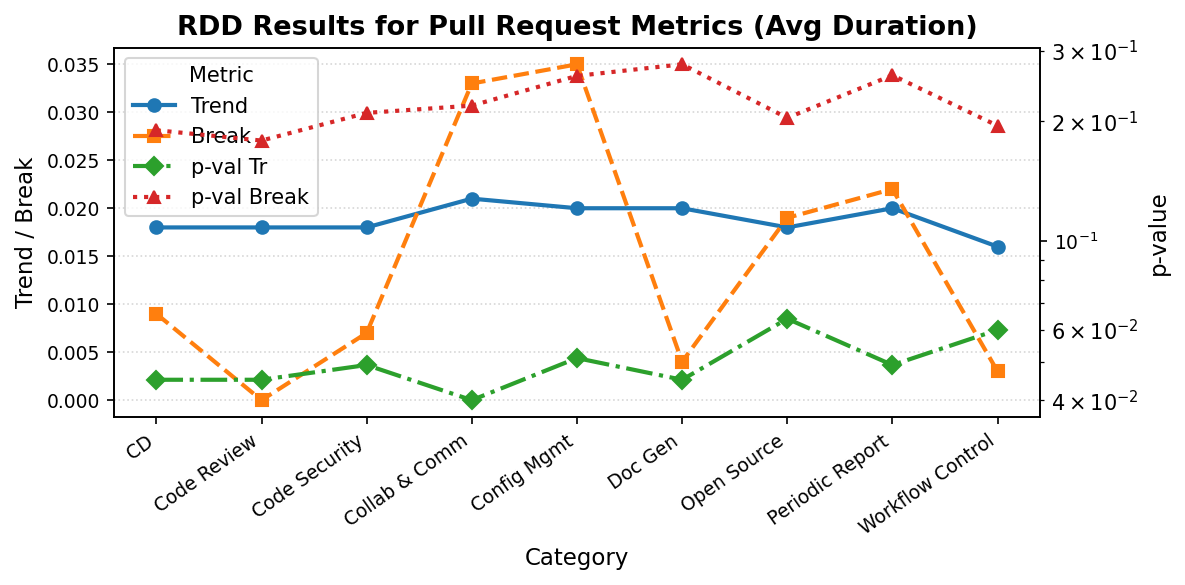

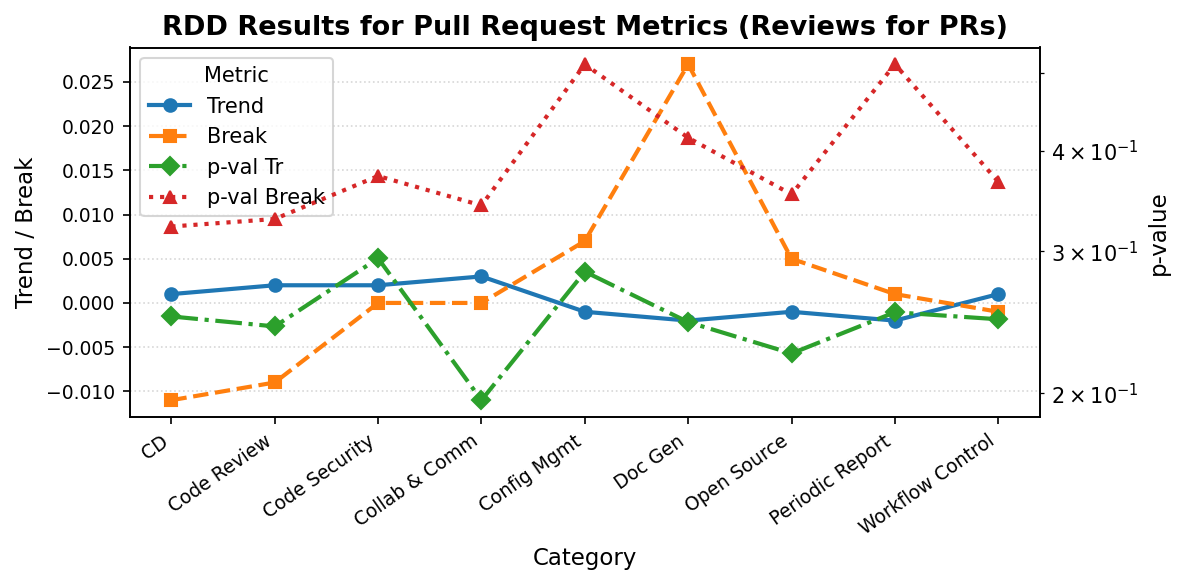

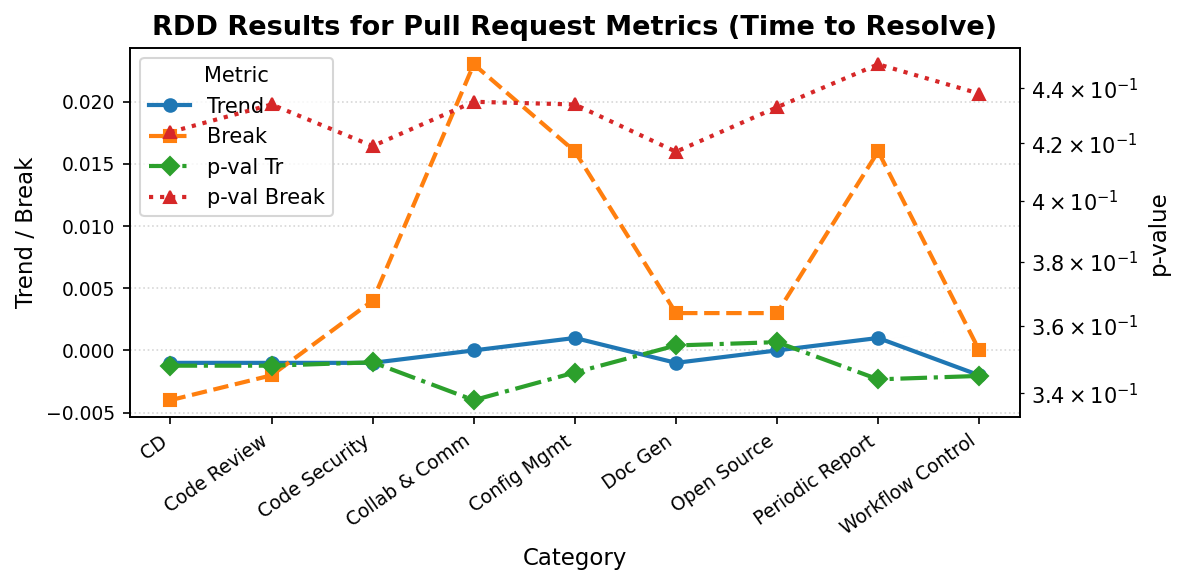

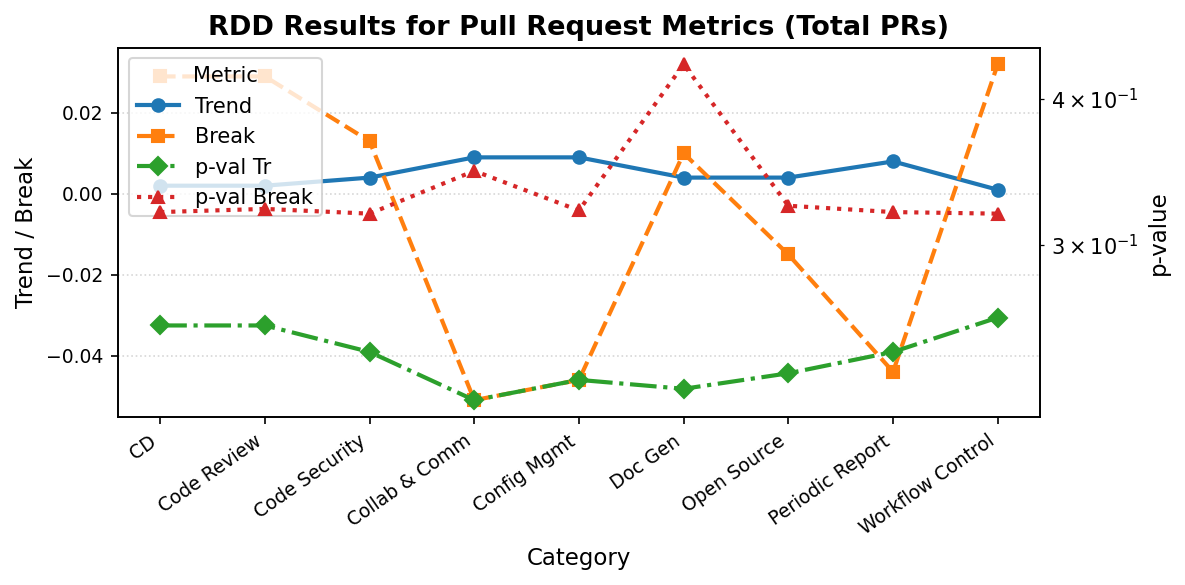

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    # Avg Duration
    ["Avg Duration", "CD", 0.431, 0.018, 0.009, "<0.001", 0.045, 0.190, 0.498, 6967],
    ["Avg Duration", "Code Review", 0.438, 0.018, 0.000, "<0.001", 0.045, 0.179, 0.504, 7244],
    ["Avg Duration", "Code Security", 0.429, 0.018, 0.007, "<0.001", 0.049, 0.210, 0.520, 506],
    ["Avg Duration", "Collab & Comm", 0.422, 0.021, 0.033, "<0.001", 0.040, 0.219, 0.520, 341],
    ["Avg Duration", "Config Mgmt", 0.407, 0.020, 0.035, "<0.001", 0.051, 0.260, 0.551, 140],
    ["Avg Duration", "Doc Gen", 0.415, 0.020, 0.004, "<0.001", 0.045, 0.278, 0.514, 256],
    ["Avg Duration", "Open Source", 0.422, 0.018, 0.019, "<0.001", 0.064, 0.204, 0.514, 663],
    ["Avg Duration", "Periodic Report", 0.408, 0.020, 0.022, "<0.001", 0.049, 0.261, 0.556, 147],
    ["Avg Duration", "Workflow Control", 0.423, 0.016, 0.003, "<0.001", 0.060, 0.195, 0.497, 1889],
    # Reviews for PRs
    ["Reviews for PRs", "CD", 0.351, 0.001, -0.011, 0.005, 0.249, 0.322, 0.214, 3148],
    ["Reviews for PRs", "Code Review", 0.349, 0.002, -0.009, 0.005, 0.242, 0.329, 0.218, 3348],
    ["Reviews for PRs", "Code Security", 0.336, 0.002, -0.000, 0.008, 0.294, 0.372, 0.201, 268],
    ["Reviews for PRs", "Collab & Comm", 0.352, 0.003, -0.000, 0.003, 0.196, 0.342, 0.262, 182],
    ["Reviews for PRs", "Config Mgmt", 0.333, -0.001, 0.007, 0.007, 0.283, 0.512, 0.200, 73],
    ["Reviews for PRs", "Doc Gen", 0.316, -0.002, 0.027, 0.008, 0.245, 0.415, 0.218, 152],
    ["Reviews for PRs", "Open Source", 0.337, -0.001, 0.005, 0.007, 0.224, 0.353, 0.233, 324],
    ["Reviews for PRs", "Periodic Report", 0.333, -0.002, 0.001, 0.007, 0.252, 0.512, 0.206, 81],
    ["Reviews for PRs", "Workflow Control", 0.351, 0.001, -0.001, 0.006, 0.247, 0.366, 0.198, 922],
    # Time to Resolve
    ["Time to Resolve", "CD", 0.249, -0.001, -0.004, 0.040, 0.348, 0.424, 0.148, 6595],
    ["Time to Resolve", "Code Review", 0.248, -0.001, -0.002, 0.042, 0.348, 0.434, 0.148, 6920],
    ["Time to Resolve", "Code Security", 0.248, -0.001, 0.004, 0.040, 0.349, 0.419, 0.137, 530],
    ["Time to Resolve", "Collab & Comm", 0.235, -0.000, 0.023, 0.047, 0.338, 0.435, 0.158, 361],
    ["Time to Resolve", "Config Mgmt", 0.237, 0.001, 0.016, 0.037, 0.346, 0.434, 0.178, 149],
    ["Time to Resolve", "Doc Gen", 0.252, -0.001, 0.003, 0.026, 0.354, 0.417, 0.178, 285],
    ["Time to Resolve", "Open Source", 0.238, 0.000, 0.003, 0.053, 0.355, 0.433, 0.134, 666],
    ["Time to Resolve", "Periodic Report", 0.239, 0.001, 0.016, 0.037, 0.344, 0.449, 0.168, 158],
    ["Time to Resolve", "Workflow Control", 0.245, -0.002, 0.000, 0.042, 0.345, 0.438, 0.144, 1887],
    # Total PRs
    ["Total PRs", "CD", 0.354, 0.002, 0.029, 0.004, 0.256, 0.320, 0.236, 6576],
    ["Total PRs", "Code Review", 0.354, 0.002, 0.029, 0.004, 0.256, 0.322, 0.235, 6898],
    ["Total PRs", "Code Security", 0.380, 0.004, 0.013, 0.003, 0.243, 0.319, 0.226, 513],
    ["Total PRs", "Collab & Comm", 0.402, 0.009, -0.051, 0.001, 0.221, 0.347, 0.262, 350],
    ["Total PRs", "Config Mgmt", 0.389, 0.009, -0.046, 0.002, 0.230, 0.321, 0.225, 142],
    ["Total PRs", "Doc Gen", 0.369, 0.004, 0.010, 0.002, 0.226, 0.428, 0.209, 273],
    ["Total PRs", "Open Source", 0.386, 0.004, -0.015, 0.002, 0.233, 0.324, 0.239, 659],
    ["Total PRs", "Periodic Report", 0.389, 0.008, -0.044, 0.002, 0.243, 0.320, 0.226, 151],
    ["Total PRs", "Workflow Control", 0.352, 0.001, 0.032, 0.004, 0.260, 0.319, 0.227, 1870],
]

columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)

# 将p值字符串转为数值
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for metric in df['Metric'].unique():
    subdf = df[df['Metric'] == metric]
    categories = subdf['Category'].tolist()
    x = range(len(categories))

    fig, ax1 = plt.subplots(figsize=(8, 4), dpi=150)

    # 主y轴：Trend 和 Break
    ax1.plot(x, subdf["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
    ax1.plot(x, subdf["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
    ax1.set_xlabel("Category", fontsize=11)
    ax1.set_ylabel("Trend / Break", fontsize=11)
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=9)
    ax1.tick_params(axis='y', labelsize=9)
    ax1.grid(axis='y', linestyle=':', alpha=0.5)
    # 副y轴：p值
    ax2 = ax1.twinx()
    ax2.plot(x, subdf["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
    ax2.plot(x, subdf["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
    ax2.set_ylabel("p-value", fontsize=11)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_yscale('log')  # p值用对数坐标更直观
    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, title="Metric")
    plt.title(f"RDD Results for Pull Request Metrics ({metric})", fontsize=13, weight='bold')
    plt.tight_layout()
    fname = f"rdd_pull_request_metrics_{metric.replace(' ', '_').replace('/', '_')}_dual_axis.pdf"
    plt.savefig(fname, bbox_inches='tight')
    plt.show()

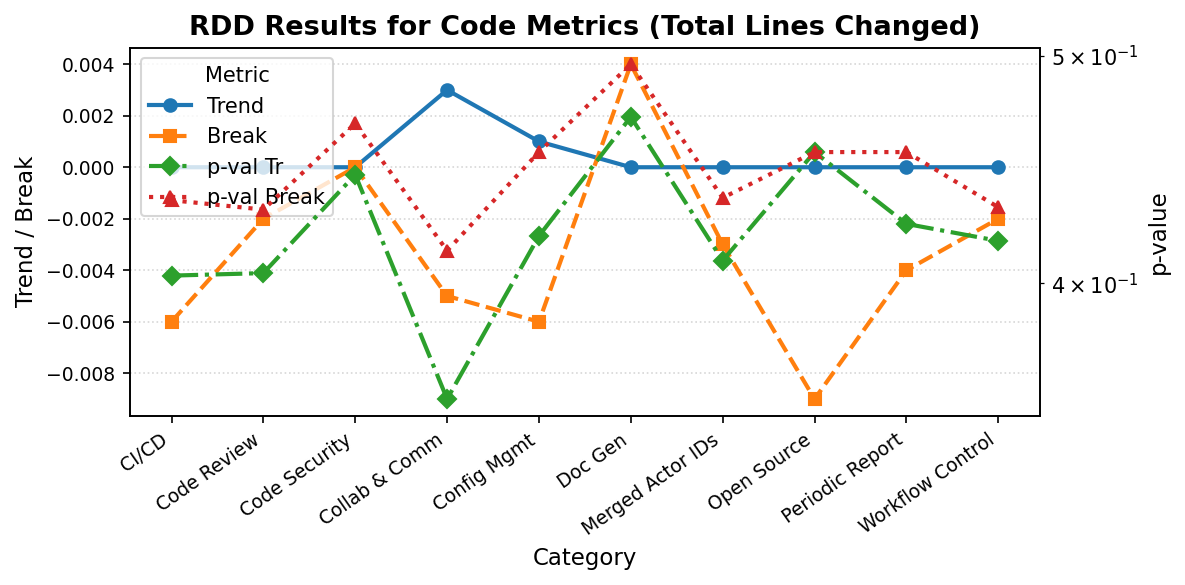

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据
data = [
    ["Total Lines Changed", "CI/CD", 0.368, 0.000, -0.006, 0.002, 0.403, 0.434, 0.103, 6104],
    ["Total Lines Changed", "Code Review", 0.363, 0.000, -0.002, 0.002, 0.404, 0.430, 0.104, 6478],
    ["Total Lines Changed", "Code Security", 0.381, 0.000, -0.000, 0.002, 0.445, 0.468, 0.093, 487],
    ["Total Lines Changed", "Collab & Comm", 0.363, 0.003, -0.005, 0.003, 0.357, 0.413, 0.114, 343],
    ["Total Lines Changed", "Config Mgmt", 0.336, 0.001, -0.006, 0.003, 0.419, 0.455, 0.107, 140],
    ["Total Lines Changed", "Doc Gen", 0.331, -0.000, 0.004, 0.003, 0.471, 0.496, 0.097, 265],
    ["Total Lines Changed", "Merged Actor IDs", 0.368, 0.000, -0.003, 0.002, 0.409, 0.435, 0.102, 8560],
    ["Total Lines Changed", "Open Source", 0.392, 0.000, -0.009, 0.001, 0.455, 0.455, 0.090, 626],
    ["Total Lines Changed", "Periodic Report", 0.338, 0.000, -0.004, 0.003, 0.424, 0.455, 0.100, 149],
    ["Total Lines Changed", "Workflow Control", 0.369, 0.000, -0.002, 0.002, 0.417, 0.431, 0.098, 1758],
]

columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)

# 转换数值型
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

categories = df['Category'].tolist()
x = range(len(categories))

fig, ax1 = plt.subplots(figsize=(8, 4), dpi=150)

# 主y轴：Trend 和 Break
ax1.plot(x, df["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
ax1.plot(x, df["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
ax1.set_xlabel("Category", fontsize=11)
ax1.set_ylabel("Trend / Break", fontsize=11)
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=9)
ax1.tick_params(axis='y', labelsize=9)
ax1.grid(axis='y', linestyle=':', alpha=0.5)

# 副y轴：p值
ax2 = ax1.twinx()
ax2.plot(x, df["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
ax2.plot(x, df["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
ax2.set_ylabel("p-value", fontsize=11)
ax2.tick_params(axis='y', labelsize=9)
ax2.set_yscale('log')  # p值用对数坐标更直观

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, title="Metric")

plt.title("RDD Results for Code Metrics (Total Lines Changed)", fontsize=13, weight='bold')
plt.tight_layout()
plt.savefig("rdd_code_metrics_total_lines_changed_dual_axis.pdf", bbox_inches='tight')
plt.show()


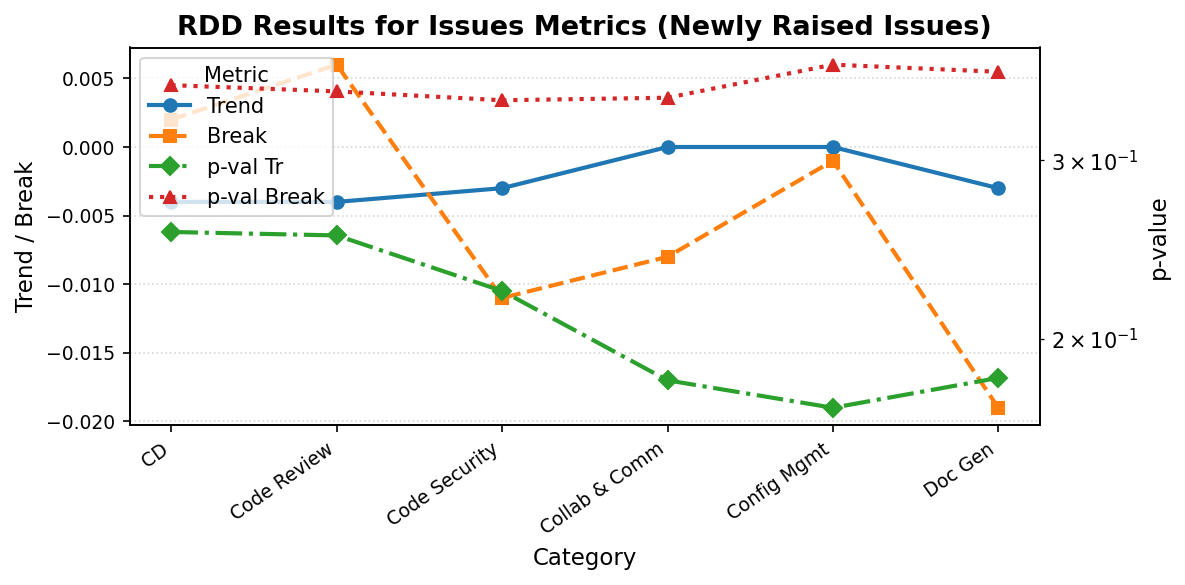

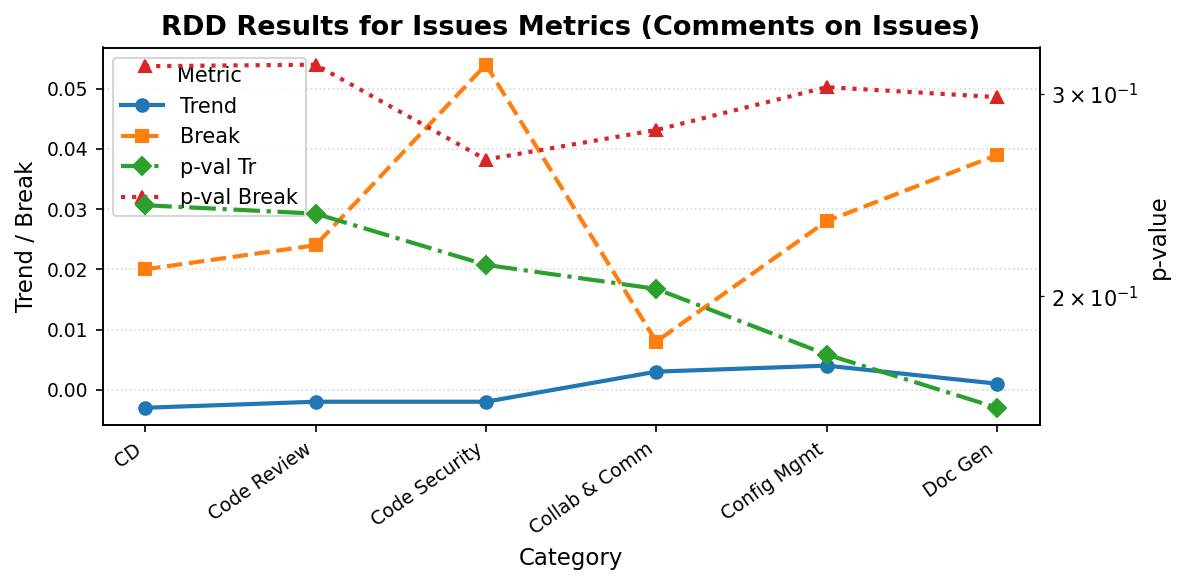

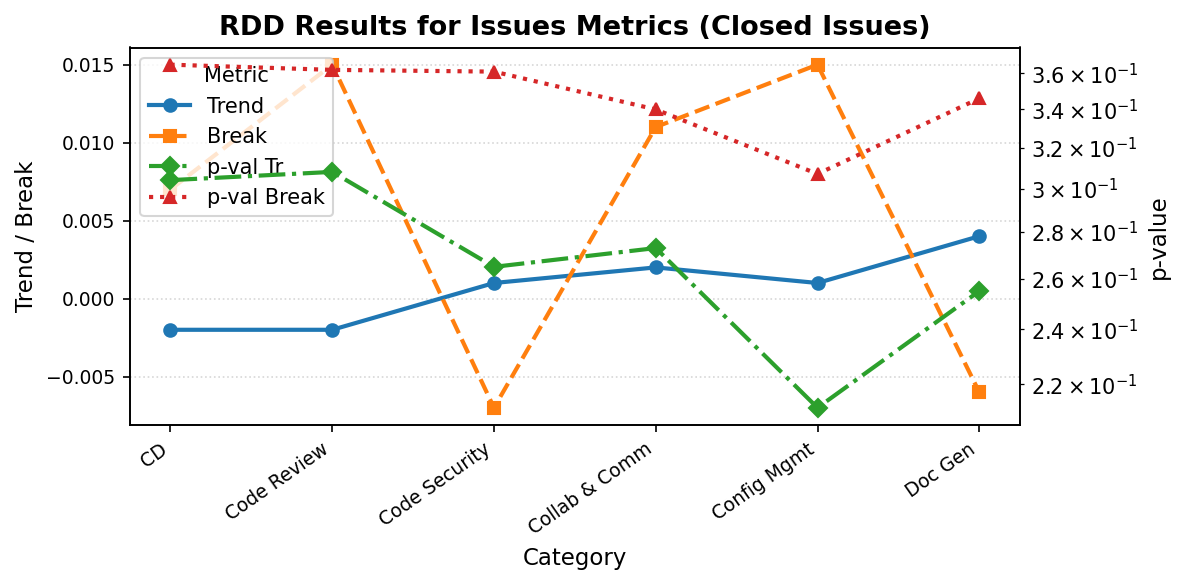

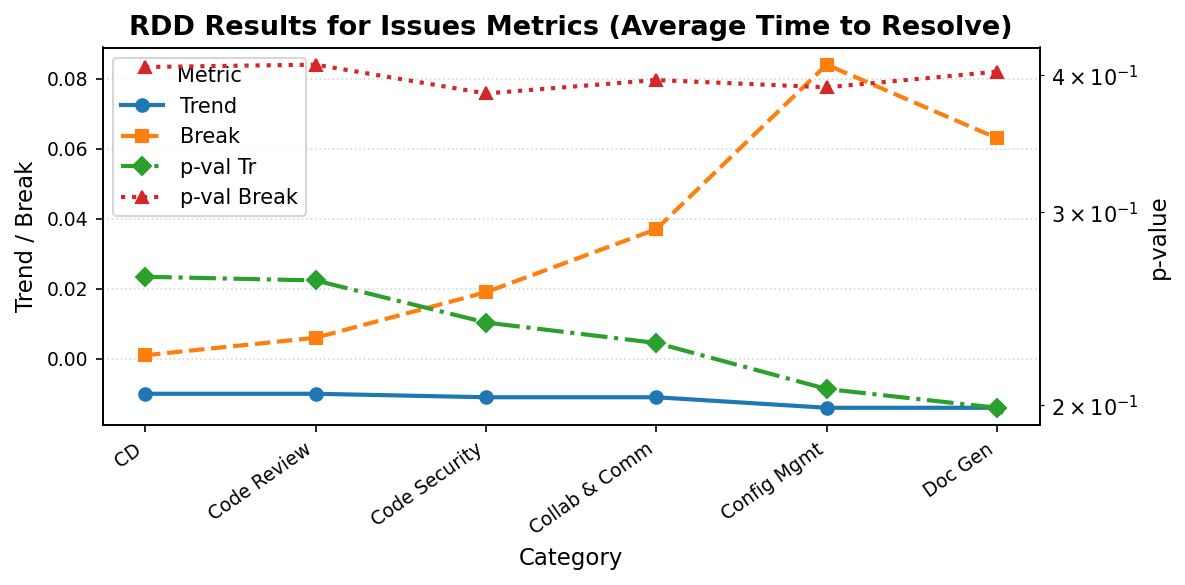

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    # Newly Raised Issues
    ["Newly Raised Issues", "CD", 0.376, -0.004, 0.002, 0.003, 0.255, 0.356, 0.229, 8163],
    ["Newly Raised Issues", "Code Review", 0.376, -0.004, 0.006, 0.003, 0.253, 0.351, 0.229, 8675],
    ["Newly Raised Issues", "Code Security", 0.387, -0.003, -0.011, 0.002, 0.223, 0.344, 0.233, 609],
    ["Newly Raised Issues", "Collab & Comm", 0.387, -0.000, -0.008, 0.001, 0.182, 0.346, 0.297, 430],
    ["Newly Raised Issues", "Config Mgmt", 0.392, -0.000, -0.001, 0.001, 0.171, 0.373, 0.326, 183],
    ["Newly Raised Issues", "Doc Gen", 0.402, -0.003, -0.019, 0.001, 0.183, 0.367, 0.330, 321],
    # Comments on Issues
    ["Comments on Issues", "CD", 0.325, -0.003, 0.020, 0.007, 0.240, 0.317, 0.229, 9749],
    ["Comments on Issues", "Code Review", 0.324, -0.002, 0.024, 0.008, 0.236, 0.318, 0.232, 10295],
    ["Comments on Issues", "Code Security", 0.322, -0.002, 0.054, 0.008, 0.213, 0.263, 0.264, 698],
    ["Comments on Issues", "Collab & Comm", 0.352, 0.003, 0.008, 0.003, 0.203, 0.279, 0.269, 469],
    ["Comments on Issues", "Config Mgmt", 0.349, 0.004, 0.028, 0.003, 0.178, 0.304, 0.274, 192],
    ["Comments on Issues", "Doc Gen", 0.323, 0.001, 0.039, 0.005, 0.160, 0.298, 0.291, 348],
    # Closed Issues
    ["Closed Issues", "CD", 0.306, -0.002, 0.007, 0.011, 0.304, 0.365, 0.168, 6173],
    ["Closed Issues", "Code Review", 0.301, -0.002, 0.015, 0.013, 0.308, 0.362, 0.169, 6600],
    ["Closed Issues", "Code Security", 0.325, 0.001, -0.007, 0.008, 0.265, 0.361, 0.174, 481],
    ["Closed Issues", "Collab & Comm", 0.302, 0.002, 0.011, 0.008, 0.273, 0.340, 0.194, 348],
    ["Closed Issues", "Config Mgmt", 0.303, 0.001, 0.015, 0.008, 0.212, 0.307, 0.200, 154],
    ["Closed Issues", "Doc Gen", 0.304, 0.004, -0.006, 0.007, 0.255, 0.346, 0.195, 279],
    # Average Time to Resolve
    ["Average Time to Resolve", "CD", 0.337, -0.010, 0.001, 0.007, 0.262, 0.407, 0.212, 7448],
    ["Average Time to Resolve", "Code Review", 0.332, -0.010, 0.006, 0.008, 0.260, 0.409, 0.212, 7985],
    ["Average Time to Resolve", "Code Security", 0.338, -0.011, 0.019, 0.008, 0.238, 0.385, 0.208, 568],
    ["Average Time to Resolve", "Collab & Comm", 0.348, -0.011, 0.037, 0.006, 0.228, 0.396, 0.233, 415],
    ["Average Time to Resolve", "Config Mgmt", 0.339, -0.014, 0.084, 0.009, 0.207, 0.390, 0.237, 179],
    ["Average Time to Resolve", "Doc Gen", 0.335, -0.014, 0.063, 0.009, 0.199, 0.403, 0.241, 312],
]

columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)

# 转换数值型
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for metric in df['Metric'].unique():
    subdf = df[df['Metric'] == metric]
    categories = subdf['Category'].tolist()
    x = range(len(categories))

    fig, ax1 = plt.subplots(figsize=(8, 4), dpi=150)

    # 主y轴：Trend 和 Break
    ax1.plot(x, subdf["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
    ax1.plot(x, subdf["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
    ax1.set_xlabel("Category", fontsize=11)
    ax1.set_ylabel("Trend / Break", fontsize=11)
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=9)
    ax1.tick_params(axis='y', labelsize=9)
    ax1.grid(axis='y', linestyle=':', alpha=0.5)

    # 副y轴：p值
    ax2 = ax1.twinx()
    ax2.plot(x, subdf["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
    ax2.plot(x, subdf["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
    ax2.set_ylabel("p-value", fontsize=11)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_yscale('log')  # p值用对数坐标更直观

    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, title="Metric")

    plt.title(f"RDD Results for Issues Metrics ({metric})", fontsize=13, weight='bold')
    plt.tight_layout()
    fname = f"rdd_issues_metrics_{metric.replace(' ', '_').replace('/', '_')}_dual_axis.pdf"
    plt.savefig(fname, bbox_inches='tight')
    plt.show()


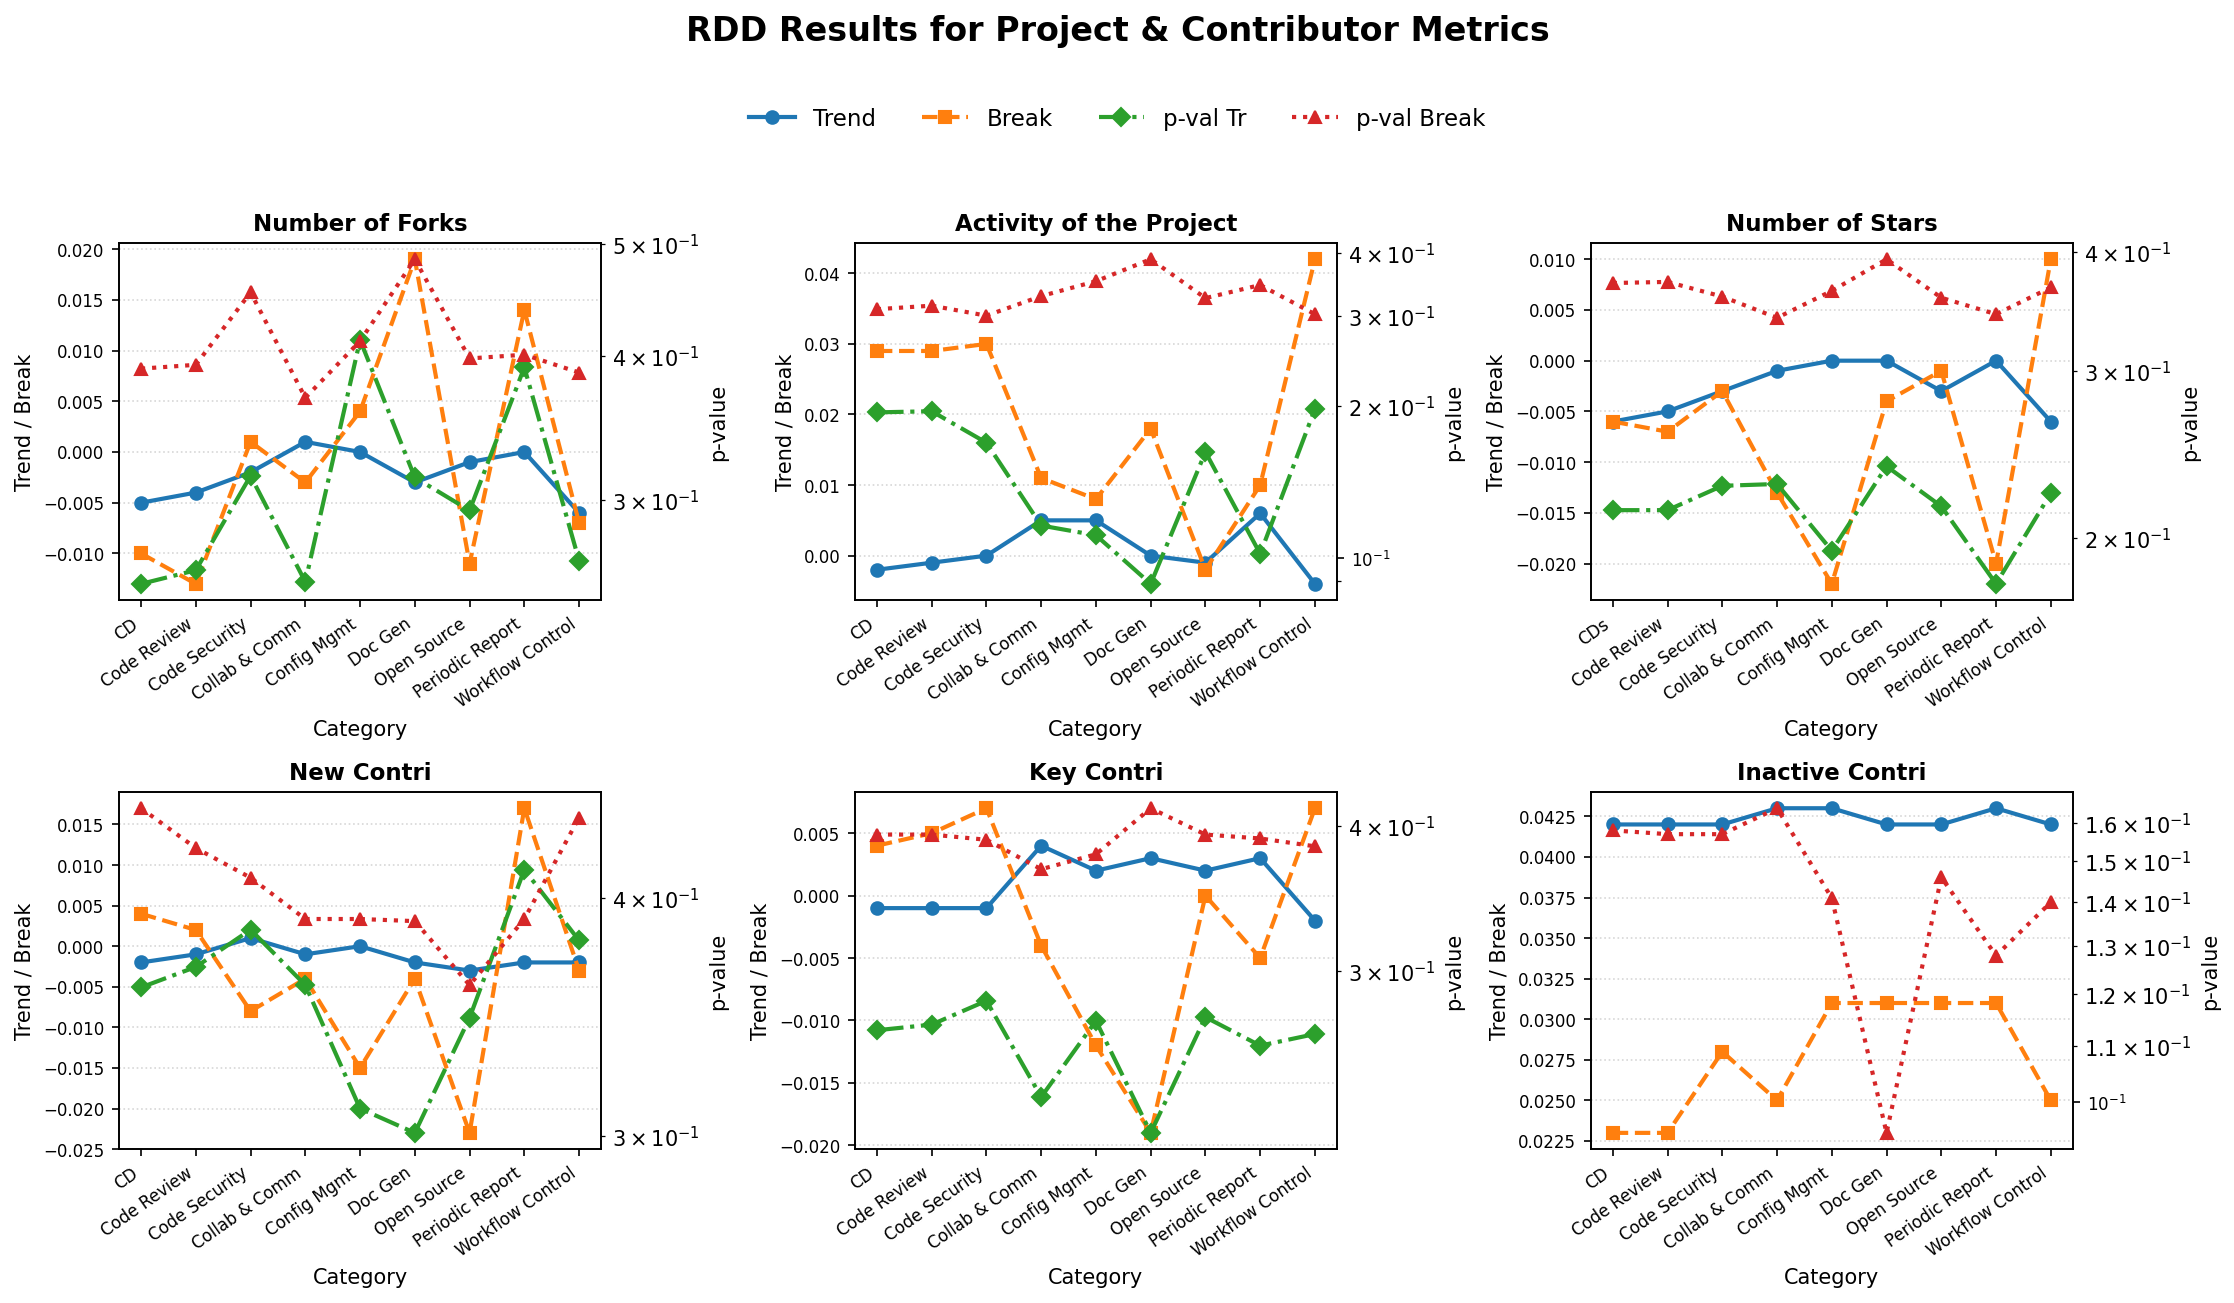

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 你的所有data合并到一个data变量即可
data = [
    ["Number of Forks", "CD", 0.403, -0.005, -0.010, 0.001, 0.254, 0.390, 0.228, 10806],
    ["Number of Forks", "Code Review", 0.405, -0.004, -0.013, 0.001, 0.261, 0.393, 0.225, 11234],
    ["Number of Forks", "Code Security", 0.405, -0.002, 0.001, 0.002, 0.315, 0.454, 0.183, 700],
    ["Number of Forks", "Collab & Comm", 0.408, 0.001, -0.003, 0.001, 0.255, 0.368, 0.244, 478],
    ["Number of Forks", "Config Mgmt", 0.423, -0.000, 0.004, 0.001, 0.413, 0.412, 0.180, 183],
    ["Number of Forks", "Doc Gen", 0.409, -0.003, 0.019, 0.001, 0.314, 0.485, 0.179, 340],
    ["Number of Forks", "Open Source", 0.412, -0.001, -0.011, 0.001, 0.294, 0.398, 0.210, 996],
    ["Number of Forks", "Periodic Report", 0.415, -0.000, 0.014, 0.001, 0.391, 0.401, 0.186, 189],
    ["Number of Forks", "Workflow Control", 0.402, -0.006, -0.007, 0.001, 0.266, 0.387, 0.222, 2836],
    # Activity of the Project
    ["Activity of the Project", "CD", 0.395, -0.002, 0.029, 0.001, 0.194, 0.310, 0.271, 10589],
    ["Activity of the Project", "Code Review", 0.397, -0.001, 0.029, 0.001, 0.195, 0.315, 0.272, 11121],
    ["Activity of the Project", "Code Security", 0.404, -0.000, 0.030, 0.001, 0.169, 0.301, 0.308, 738],
    ["Activity of the Project", "Collab & Comm", 0.431, 0.005, 0.011, 0.000, 0.116, 0.329, 0.311, 495],
    ["Activity of the Project", "Config Mgmt", 0.448, 0.005, 0.008, 0.000, 0.111, 0.352, 0.305, 199],
    ["Activity of the Project", "Doc Gen", 0.417, -0.000, 0.018, 0.000, 0.089, 0.389, 0.326, 358],
    ["Activity of the Project", "Open Source", 0.427, -0.001, -0.002, 0.001, 0.162, 0.326, 0.309, 1028],
    ["Activity of the Project", "Periodic Report", 0.442, 0.006, 0.010, 0.000, 0.102, 0.346, 0.322, 208],
    ["Activity of the Project", "Workflow Control", 0.391, -0.004, 0.042, 0.001, 0.197, 0.303, 0.275, 2920],
    # Number of Stars
    ["Number of Stars", "CDs", 0.335, -0.006, -0.006, 0.004, 0.214, 0.371, 0.242, 12411],
    ["Number of Stars", "Code Review", 0.339, -0.005, -0.007, 0.003, 0.214, 0.372, 0.242, 12862],
    ["Number of Stars", "Code Security", 0.341, -0.003, -0.003, 0.003, 0.227, 0.359, 0.225, 781],
    ["Number of Stars", "Collab & Comm", 0.340, -0.001, -0.013, 0.003, 0.228, 0.341, 0.250, 526],
    ["Number of Stars", "Config Mgmt", 0.359, -0.000, -0.022, 0.002, 0.194, 0.364, 0.243, 202],
    ["Number of Stars", "Doc Gen", 0.367, -0.000, -0.004, 0.002, 0.238, 0.393, 0.224, 359],
    ["Number of Stars", "Open Source", 0.340, -0.003, -0.001, 0.004, 0.216, 0.358, 0.224, 1128],
    ["Number of Stars", "Periodic Report", 0.357, -0.000, -0.020, 0.002, 0.179, 0.344, 0.247, 207],
    ["Number of Stars", "Workflow Control", 0.328, -0.006, 0.010, 0.004, 0.223, 0.367, 0.229, 3278],
    ["New Contri", "CD", 0.383, -0.002, 0.004, 0.004, 0.359, 0.446, 0.130, 1728],
    ["New Contri", "Code Review", 0.385, -0.001, 0.002, 0.004, 0.368, 0.425, 0.131, 1785],
    ["New Contri", "Code Security", 0.415, 0.001, -0.008, 0.002, 0.385, 0.410, 0.126, 115],
    ["New Contri", "Collab & Comm", 0.413, -0.001, -0.004, 0.002, 0.360, 0.390, 0.145, 113],
    ["New Contri", "Config Mgmt", 0.388, -0.000, -0.015, 0.003, 0.310, 0.390, 0.144, 47],
    ["New Contri", "Doc Gen", 0.394, -0.002, -0.004, 0.003, 0.301, 0.389, 0.142, 136],
    ["New Contri", "Open Source", 0.394, -0.003, -0.023, 0.003, 0.346, 0.360, 0.155, 190],
    ["New Contri", "Periodic Report", 0.378, -0.002, 0.017, 0.004, 0.414, 0.390, 0.128, 52],
    ["New Contri", "Workflow Control", 0.388, -0.002, -0.003, 0.004, 0.380, 0.441, 0.131, 432],
    # Key Contri
    ["Key Contri", "CD", 0.374, -0.001, 0.004, 0.004, 0.267, 0.393, 0.195, 10452],
    ["Key Contri", "Code Review", 0.373, -0.001, 0.005, 0.004, 0.270, 0.393, 0.195, 11002],
    ["Key Contri", "Code Security", 0.372, -0.001, 0.007, 0.004, 0.283, 0.389, 0.199, 730],
    ["Key Contri", "Collab & Comm", 0.404, 0.004, -0.004, 0.002, 0.234, 0.367, 0.234, 494],
    ["Key Contri", "Config Mgmt", 0.441, 0.002, -0.012, 0.001, 0.272, 0.378, 0.254, 198],
    ["Key Contri", "Doc Gen", 0.433, 0.003, -0.019, 0.001, 0.218, 0.414, 0.266, 356],
    ["Key Contri", "Open Source", 0.391, 0.002, 0.000, 0.003, 0.274, 0.393, 0.218, 1027],
    ["Key Contri", "Periodic Report", 0.431, 0.003, -0.005, 0.001, 0.259, 0.390, 0.266, 207],
    ["Key Contri", "Workflow Control", 0.370, -0.002, 0.007, 0.004, 0.265, 0.384, 0.196, 2892],
    # Inactive Contri
    ["Inactive Contri", "CD", 0.504, 0.042, 0.023, "<0.001", "<0.001", 0.158, 0.958, 9429],
    ["Inactive Contri", "Code Review", 0.503, 0.042, 0.023, "<0.001", "<0.001", 0.157, 0.959, 9711],
    ["Inactive Contri", "Code Security", 0.499, 0.042, 0.028, "<0.001", "<0.001", 0.157, 0.968, 611],
    ["Inactive Contri", "Collab & Comm", 0.512, 0.043, 0.025, "<0.001", "<0.001", 0.164, 0.973, 375],
    ["Inactive Contri", "Config Mgmt", 0.495, 0.043, 0.031, "<0.001", "<0.001", 0.141, 0.976, 161],
    ["Inactive Contri", "Doc Gen", 0.509, 0.042, 0.031, "<0.001", "<0.001", 0.095, 0.984, 283],
    ["Inactive Contri", "Open Source", 0.500, 0.042, 0.031, "<0.001", "<0.001", 0.146, 0.965, 795],
    ["Inactive Contri", "Periodic Report", 0.507, 0.043, 0.031, "<0.001", "<0.001", 0.128, 0.976, 162],
    ["Inactive Contri", "Workflow Control", 0.496, 0.042, 0.025, "<0.001", "<0.001", 0.140, 0.964, 2549],
]
columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)
# 转换数值型
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
metrics = df['Metric'].unique()
n_metrics = len(metrics)
ncols = 3
nrows = (n_metrics + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4), dpi=150)
axes = axes.flatten()
# 只收集一次所有线的句柄和标签
all_handles = []
all_labels = []
for idx, metric in enumerate(metrics):
    subdf = df[df['Metric'] == metric]
    categories = subdf['Category'].tolist()
    x = range(len(categories))
    ax1 = axes[idx]
    # 主y轴
    l1, = ax1.plot(x, subdf["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
    l2, = ax1.plot(x, subdf["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
    ax1.set_xlabel("Category", fontsize=10)
    ax1.set_ylabel("Trend / Break", fontsize=10)
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=8)
    ax1.tick_params(axis='y', labelsize=8)
    ax1.grid(axis='y', linestyle=':', alpha=0.5)
    # 副y轴
    ax2 = ax1.twinx()
    l3, = ax2.plot(x, subdf["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
    l4, = ax2.plot(x, subdf["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
    ax2.set_ylabel("p-value", fontsize=10)
    ax2.tick_params(axis='y', labelsize=8)
    ax2.set_yscale('log')
    # 标题
    ax1.set_title(metric, fontsize=11, weight='bold')
    # 只收集一次图例
    if idx == 0:
        all_handles = [l1, l2, l3, l4]
        all_labels = [h.get_label() for h in all_handles]
# 多余子图隐藏
for j in range(idx+1, len(axes)):
    axes[j].axis('off')
fig.suptitle("RDD Results for Project & Contributor Metrics", fontsize=16, weight='bold', y=1.08)
fig.legend(all_handles, all_labels, loc='upper center', ncol=4, fontsize=11, frameon=False, bbox_to_anchor=(0.5, 1.02))
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("rdd_project_contributor_metrics_allinone_with_legend.pdf", bbox_inches='tight')
plt.show()


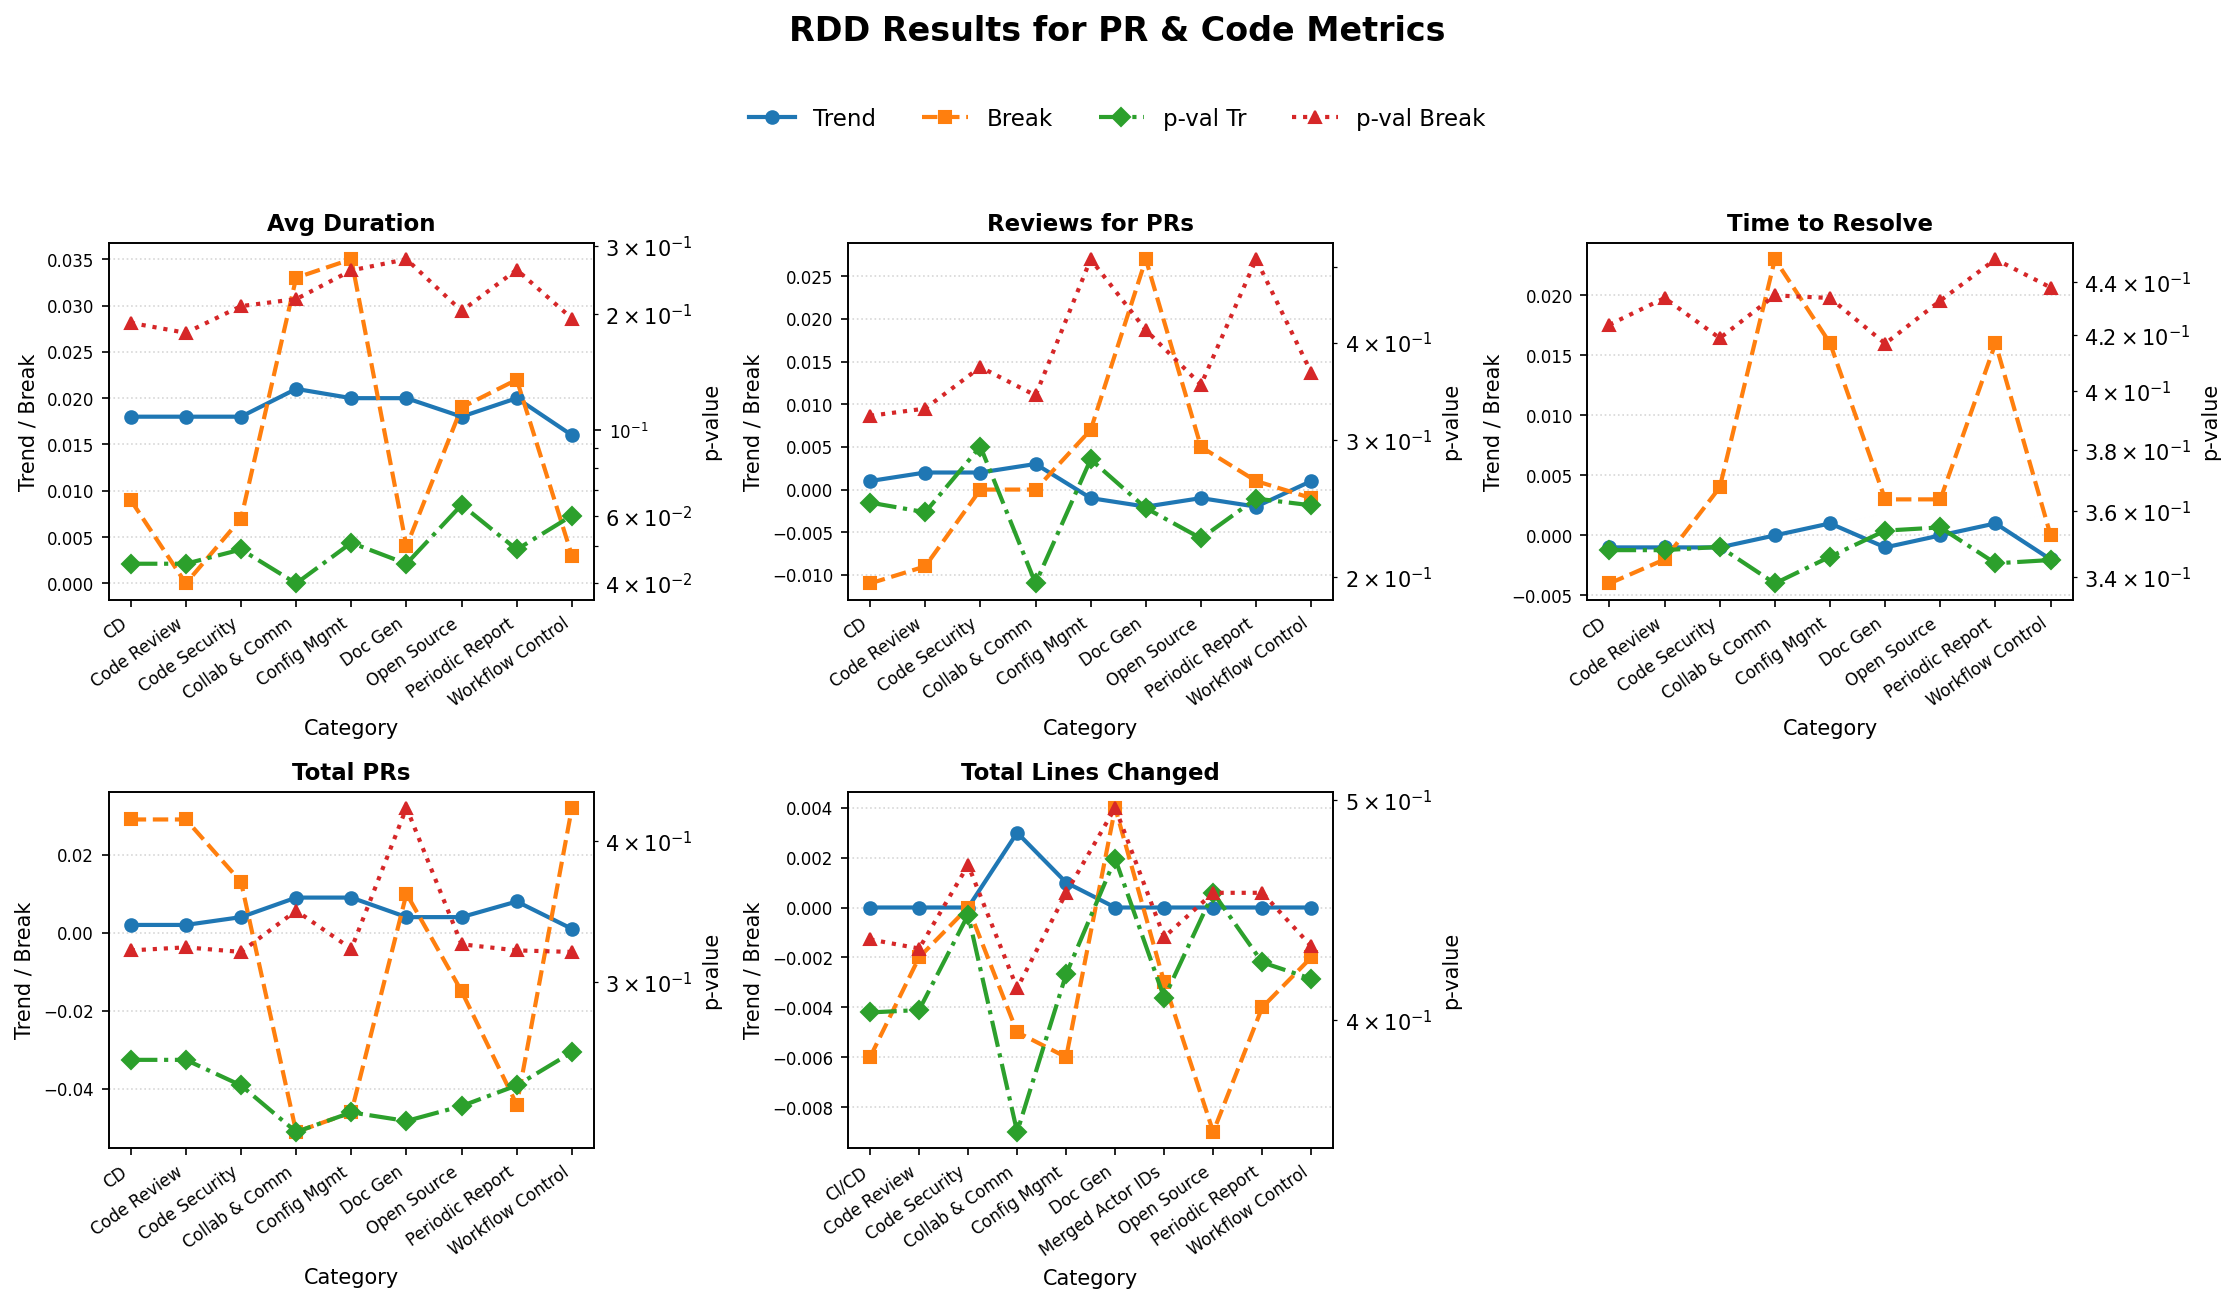

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    # Avg Duration
    ["Avg Duration", "CD", 0.431, 0.018, 0.009, "<0.001", 0.045, 0.190, 0.498, 6967],
    ["Avg Duration", "Code Review", 0.438, 0.018, 0.000, "<0.001", 0.045, 0.179, 0.504, 7244],
    ["Avg Duration", "Code Security", 0.429, 0.018, 0.007, "<0.001", 0.049, 0.210, 0.520, 506],
    ["Avg Duration", "Collab & Comm", 0.422, 0.021, 0.033, "<0.001", 0.040, 0.219, 0.520, 341],
    ["Avg Duration", "Config Mgmt", 0.407, 0.020, 0.035, "<0.001", 0.051, 0.260, 0.551, 140],
    ["Avg Duration", "Doc Gen", 0.415, 0.020, 0.004, "<0.001", 0.045, 0.278, 0.514, 256],
    ["Avg Duration", "Open Source", 0.422, 0.018, 0.019, "<0.001", 0.064, 0.204, 0.514, 663],
    ["Avg Duration", "Periodic Report", 0.408, 0.020, 0.022, "<0.001", 0.049, 0.261, 0.556, 147],
    ["Avg Duration", "Workflow Control", 0.423, 0.016, 0.003, "<0.001", 0.060, 0.195, 0.497, 1889],
    # Reviews for PRs
    ["Reviews for PRs", "CD", 0.351, 0.001, -0.011, 0.005, 0.249, 0.322, 0.214, 3148],
    ["Reviews for PRs", "Code Review", 0.349, 0.002, -0.009, 0.005, 0.242, 0.329, 0.218, 3348],
    ["Reviews for PRs", "Code Security", 0.336, 0.002, -0.000, 0.008, 0.294, 0.372, 0.201, 268],
    ["Reviews for PRs", "Collab & Comm", 0.352, 0.003, -0.000, 0.003, 0.196, 0.342, 0.262, 182],
    ["Reviews for PRs", "Config Mgmt", 0.333, -0.001, 0.007, 0.007, 0.283, 0.512, 0.200, 73],
    ["Reviews for PRs", "Doc Gen", 0.316, -0.002, 0.027, 0.008, 0.245, 0.415, 0.218, 152],
    ["Reviews for PRs", "Open Source", 0.337, -0.001, 0.005, 0.007, 0.224, 0.353, 0.233, 324],
    ["Reviews for PRs", "Periodic Report", 0.333, -0.002, 0.001, 0.007, 0.252, 0.512, 0.206, 81],
    ["Reviews for PRs", "Workflow Control", 0.351, 0.001, -0.001, 0.006, 0.247, 0.366, 0.198, 922],
    # Time to Resolve
    ["Time to Resolve", "CD", 0.249, -0.001, -0.004, 0.040, 0.348, 0.424, 0.148, 6595],
    ["Time to Resolve", "Code Review", 0.248, -0.001, -0.002, 0.042, 0.348, 0.434, 0.148, 6920],
    ["Time to Resolve", "Code Security", 0.248, -0.001, 0.004, 0.040, 0.349, 0.419, 0.137, 530],
    ["Time to Resolve", "Collab & Comm", 0.235, -0.000, 0.023, 0.047, 0.338, 0.435, 0.158, 361],
    ["Time to Resolve", "Config Mgmt", 0.237, 0.001, 0.016, 0.037, 0.346, 0.434, 0.178, 149],
    ["Time to Resolve", "Doc Gen", 0.252, -0.001, 0.003, 0.026, 0.354, 0.417, 0.178, 285],
    ["Time to Resolve", "Open Source", 0.238, 0.000, 0.003, 0.053, 0.355, 0.433, 0.134, 666],
    ["Time to Resolve", "Periodic Report", 0.239, 0.001, 0.016, 0.037, 0.344, 0.449, 0.168, 158],
    ["Time to Resolve", "Workflow Control", 0.245, -0.002, 0.000, 0.042, 0.345, 0.438, 0.144, 1887],
    # Total PRs
    ["Total PRs", "CD", 0.354, 0.002, 0.029, 0.004, 0.256, 0.320, 0.236, 6576],
    ["Total PRs", "Code Review", 0.354, 0.002, 0.029, 0.004, 0.256, 0.322, 0.235, 6898],
    ["Total PRs", "Code Security", 0.380, 0.004, 0.013, 0.003, 0.243, 0.319, 0.226, 513],
    ["Total PRs", "Collab & Comm", 0.402, 0.009, -0.051, 0.001, 0.221, 0.347, 0.262, 350],
    ["Total PRs", "Config Mgmt", 0.389, 0.009, -0.046, 0.002, 0.230, 0.321, 0.225, 142],
    ["Total PRs", "Doc Gen", 0.369, 0.004, 0.010, 0.002, 0.226, 0.428, 0.209, 273],
    ["Total PRs", "Open Source", 0.386, 0.004, -0.015, 0.002, 0.233, 0.324, 0.239, 659],
    ["Total PRs", "Periodic Report", 0.389, 0.008, -0.044, 0.002, 0.243, 0.320, 0.226, 151],
    ["Total PRs", "Workflow Control", 0.352, 0.001, 0.032, 0.004, 0.260, 0.319, 0.227, 1870],
    ["Total Lines Changed", "CI/CD", 0.368, 0.000, -0.006, 0.002, 0.403, 0.434, 0.103, 6104],
    ["Total Lines Changed", "Code Review", 0.363, 0.000, -0.002, 0.002, 0.404, 0.430, 0.104, 6478],
    ["Total Lines Changed", "Code Security", 0.381, 0.000, -0.000, 0.002, 0.445, 0.468, 0.093, 487],
    ["Total Lines Changed", "Collab & Comm", 0.363, 0.003, -0.005, 0.003, 0.357, 0.413, 0.114, 343],
    ["Total Lines Changed", "Config Mgmt", 0.336, 0.001, -0.006, 0.003, 0.419, 0.455, 0.107, 140],
    ["Total Lines Changed", "Doc Gen", 0.331, -0.000, 0.004, 0.003, 0.471, 0.496, 0.097, 265],
    ["Total Lines Changed", "Merged Actor IDs", 0.368, 0.000, -0.003, 0.002, 0.409, 0.435, 0.102, 8560],
    ["Total Lines Changed", "Open Source", 0.392, 0.000, -0.009, 0.001, 0.455, 0.455, 0.090, 626],
    ["Total Lines Changed", "Periodic Report", 0.338, 0.000, -0.004, 0.003, 0.424, 0.455, 0.100, 149],
    ["Total Lines Changed", "Workflow Control", 0.369, 0.000, -0.002, 0.002, 0.417, 0.431, 0.098, 1758],
]

columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)
# 转换数值型
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
metrics = df['Metric'].unique()
n_metrics = len(metrics)
ncols = 3
nrows = (n_metrics + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4), dpi=150)
axes = axes.flatten()
# 只收集一次所有线的句柄和标签
all_handles = []
all_labels = []
for idx, metric in enumerate(metrics):
    subdf = df[df['Metric'] == metric]
    categories = subdf['Category'].tolist()
    x = range(len(categories))
    ax1 = axes[idx]
    # 主y轴
    l1, = ax1.plot(x, subdf["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
    l2, = ax1.plot(x, subdf["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
    ax1.set_xlabel("Category", fontsize=10)
    ax1.set_ylabel("Trend / Break", fontsize=10)
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=8)
    ax1.tick_params(axis='y', labelsize=8)
    ax1.grid(axis='y', linestyle=':', alpha=0.5)
    # 副y轴
    ax2 = ax1.twinx()
    l3, = ax2.plot(x, subdf["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
    l4, = ax2.plot(x, subdf["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
    ax2.set_ylabel("p-value", fontsize=10)
    ax2.tick_params(axis='y', labelsize=8)
    ax2.set_yscale('log')
    # 标题
    ax1.set_title(metric, fontsize=11, weight='bold')
    # 只收集一次图例
    if idx == 0:
        all_handles = [l1, l2, l3, l4]
        all_labels = [h.get_label() for h in all_handles]
# 多余子图隐藏
for j in range(idx+1, len(axes)):
    axes[j].axis('off')
fig.suptitle("RDD Results for PR & Code Metrics", fontsize=16, weight='bold', y=1.08)
fig.legend(all_handles, all_labels, loc='upper center', ncol=4, fontsize=11, frameon=False, bbox_to_anchor=(0.5, 1.02))
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("rdd_PR_Code_metrics_allinone_with_legend.pdf", bbox_inches='tight')
plt.show()

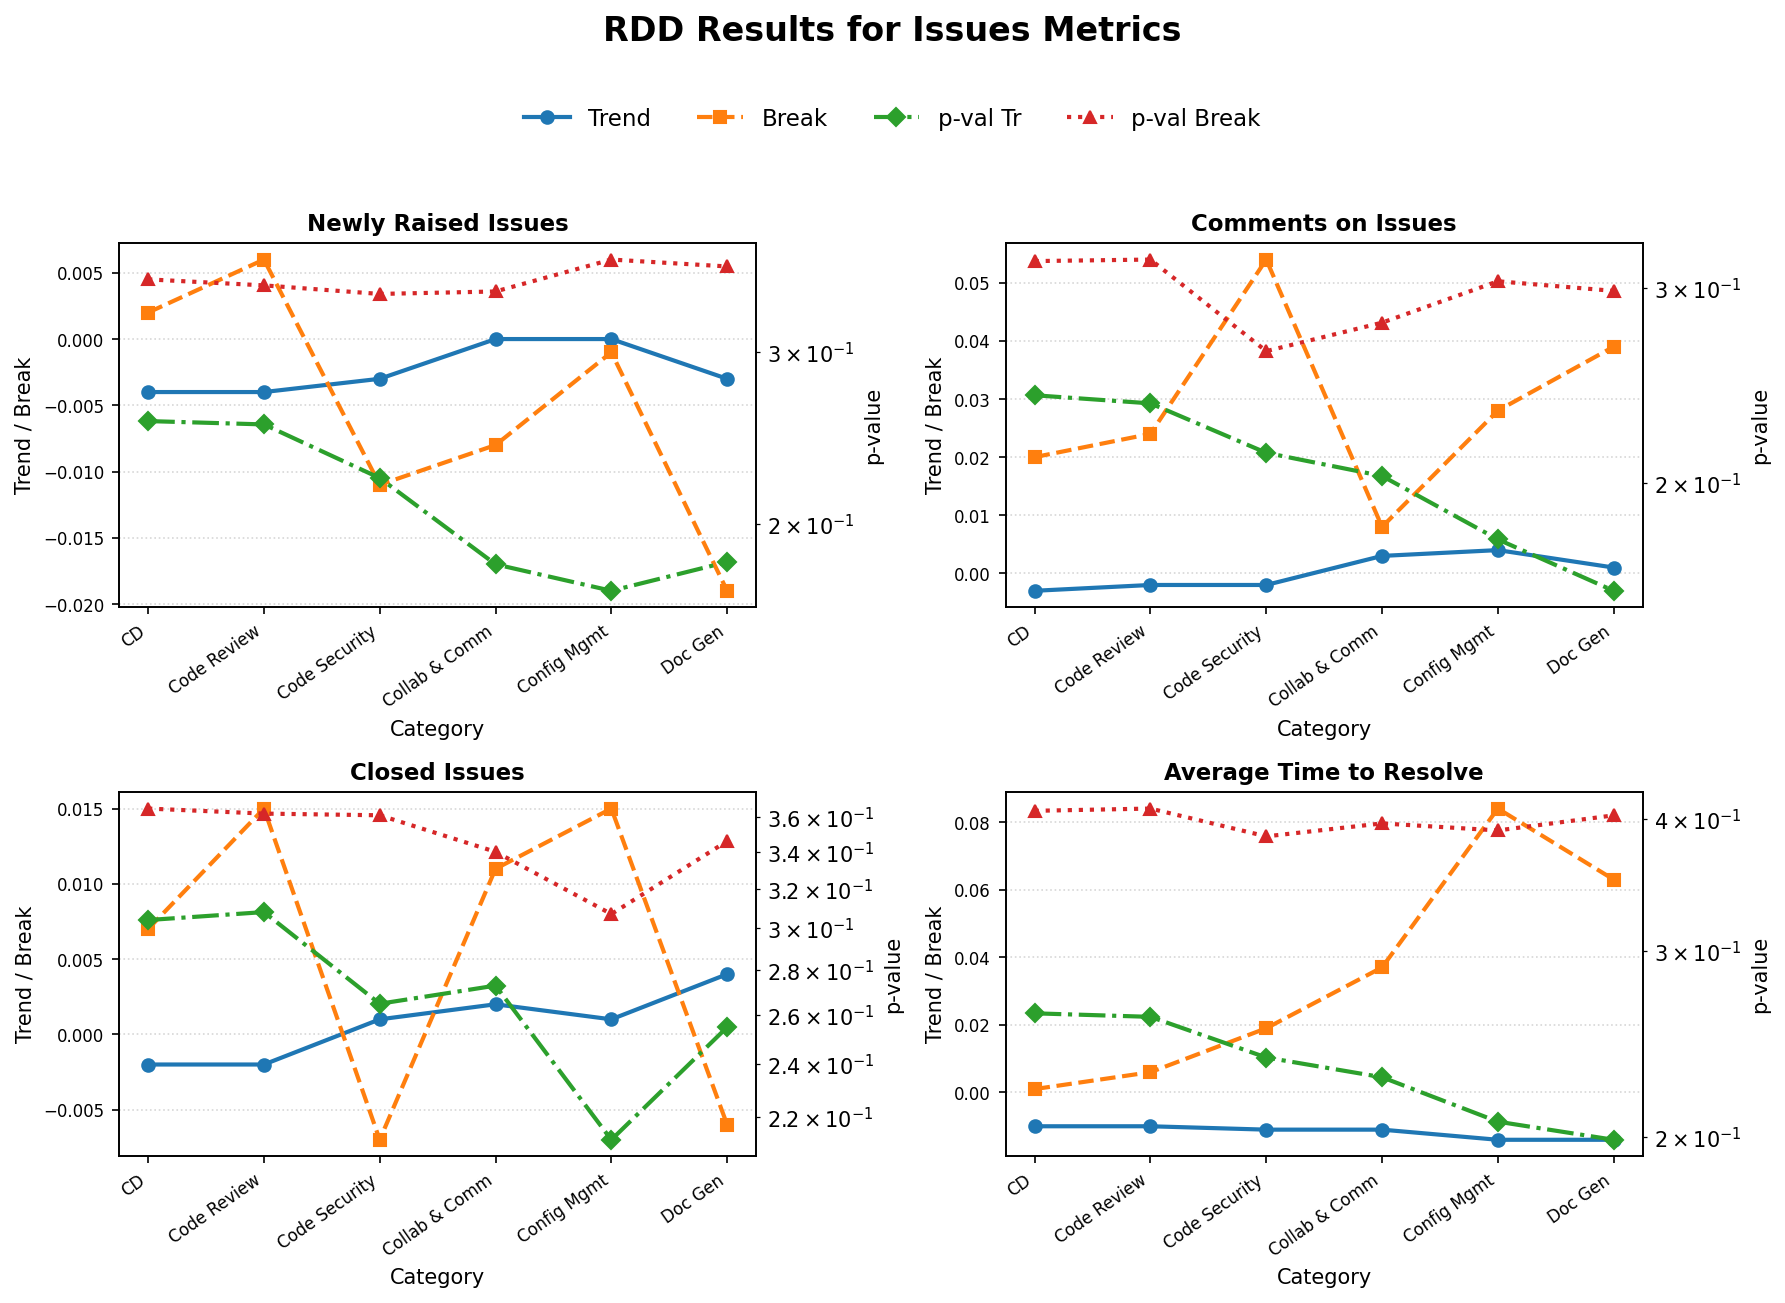

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    # Newly Raised Issues
    ["Newly Raised Issues", "CD", 0.376, -0.004, 0.002, 0.003, 0.255, 0.356, 0.229, 8163],
    ["Newly Raised Issues", "Code Review", 0.376, -0.004, 0.006, 0.003, 0.253, 0.351, 0.229, 8675],
    ["Newly Raised Issues", "Code Security", 0.387, -0.003, -0.011, 0.002, 0.223, 0.344, 0.233, 609],
    ["Newly Raised Issues", "Collab & Comm", 0.387, -0.000, -0.008, 0.001, 0.182, 0.346, 0.297, 430],
    ["Newly Raised Issues", "Config Mgmt", 0.392, -0.000, -0.001, 0.001, 0.171, 0.373, 0.326, 183],
    ["Newly Raised Issues", "Doc Gen", 0.402, -0.003, -0.019, 0.001, 0.183, 0.367, 0.330, 321],
    # Comments on Issues
    ["Comments on Issues", "CD", 0.325, -0.003, 0.020, 0.007, 0.240, 0.317, 0.229, 9749],
    ["Comments on Issues", "Code Review", 0.324, -0.002, 0.024, 0.008, 0.236, 0.318, 0.232, 10295],
    ["Comments on Issues", "Code Security", 0.322, -0.002, 0.054, 0.008, 0.213, 0.263, 0.264, 698],
    ["Comments on Issues", "Collab & Comm", 0.352, 0.003, 0.008, 0.003, 0.203, 0.279, 0.269, 469],
    ["Comments on Issues", "Config Mgmt", 0.349, 0.004, 0.028, 0.003, 0.178, 0.304, 0.274, 192],
    ["Comments on Issues", "Doc Gen", 0.323, 0.001, 0.039, 0.005, 0.160, 0.298, 0.291, 348],
    # Closed Issues
    ["Closed Issues", "CD", 0.306, -0.002, 0.007, 0.011, 0.304, 0.365, 0.168, 6173],
    ["Closed Issues", "Code Review", 0.301, -0.002, 0.015, 0.013, 0.308, 0.362, 0.169, 6600],
    ["Closed Issues", "Code Security", 0.325, 0.001, -0.007, 0.008, 0.265, 0.361, 0.174, 481],
    ["Closed Issues", "Collab & Comm", 0.302, 0.002, 0.011, 0.008, 0.273, 0.340, 0.194, 348],
    ["Closed Issues", "Config Mgmt", 0.303, 0.001, 0.015, 0.008, 0.212, 0.307, 0.200, 154],
    ["Closed Issues", "Doc Gen", 0.304, 0.004, -0.006, 0.007, 0.255, 0.346, 0.195, 279],
    # Average Time to Resolve
    ["Average Time to Resolve", "CD", 0.337, -0.010, 0.001, 0.007, 0.262, 0.407, 0.212, 7448],
    ["Average Time to Resolve", "Code Review", 0.332, -0.010, 0.006, 0.008, 0.260, 0.409, 0.212, 7985],
    ["Average Time to Resolve", "Code Security", 0.338, -0.011, 0.019, 0.008, 0.238, 0.385, 0.208, 568],
    ["Average Time to Resolve", "Collab & Comm", 0.348, -0.011, 0.037, 0.006, 0.228, 0.396, 0.233, 415],
    ["Average Time to Resolve", "Config Mgmt", 0.339, -0.014, 0.084, 0.009, 0.207, 0.390, 0.237, 179],
    ["Average Time to Resolve", "Doc Gen", 0.335, -0.014, 0.063, 0.009, 0.199, 0.403, 0.241, 312],
]

columns = ["Metric", "Category", "Int.", "Trend", "Break", "p-val Int", "p-val Tr", "p-val Break", "R2", "Rows"]
df = pd.DataFrame(data, columns=columns)

# 转换数值型
for col in ["Trend", "Break", "p-val Tr", "p-val Break"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

metrics = df['Metric'].unique()
n_metrics = len(metrics)
ncols = 2
nrows = (n_metrics + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*3), dpi=150)
axes = axes.flatten()

# 只收集一次所有线的句柄和标签
all_handles = []
all_labels = []

for idx, metric in enumerate(metrics):
    subdf = df[df['Metric'] == metric]
    categories = subdf['Category'].tolist()
    x = range(len(categories))
    ax1 = axes[idx]
    # 主y轴
    l1, = ax1.plot(x, subdf["Trend"], marker='o', linestyle='-', color='#1f77b4', label="Trend", linewidth=2)
    l2, = ax1.plot(x, subdf["Break"], marker='s', linestyle='--', color='#ff7f0e', label="Break", linewidth=2)
    ax1.set_xlabel("Category", fontsize=10)
    ax1.set_ylabel("Trend / Break", fontsize=10)
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=35, ha='right', fontsize=8)
    ax1.tick_params(axis='y', labelsize=8)
    ax1.grid(axis='y', linestyle=':', alpha=0.5)
    # 副y轴
    ax2 = ax1.twinx()
    l3, = ax2.plot(x, subdf["p-val Tr"], marker='D', linestyle='-.', color='#2ca02c', label="p-val Tr", linewidth=2)
    l4, = ax2.plot(x, subdf["p-val Break"], marker='^', linestyle=':', color='#d62728', label="p-val Break", linewidth=2)
    ax2.set_ylabel("p-value", fontsize=10)
    ax2.tick_params(axis='y', labelsize=8)
    ax2.set_yscale('log')
    # 标题
    ax1.set_title(metric, fontsize=11, weight='bold')
    # 只收集一次图例
    if idx == 0:
        all_handles = [l1, l2, l3, l4]
        all_labels = [h.get_label() for h in all_handles]
# 多余子图隐藏
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("RDD Results for Issues Metrics", fontsize=16, weight='bold', y=1.08)
fig.legend(all_handles, all_labels, loc='upper center', ncol=4, fontsize=11, frameon=False, bbox_to_anchor=(0.5, 1.02))
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("rdd_issues_metrics_allinone_with_legend.pdf", bbox_inches='tight')
plt.show()
